In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammadranjbar","key":"8b08cbd1ae64f7997d0a7c7323b2e14b"}'}

In [2]:
!pip install scikit-plot

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json




In [4]:
!kaggle datasets download -d paultimothymooney/denver-crime-data

 46% 9.00M/19.6M [00:00<00:00, 21.8MB/s]
100% 19.6M/19.6M [00:00<00:00, 41.8MB/s]


In [5]:
!unzip denver-crime-data.zip

Archive:  denver-crime-data.zip
  inflating: crime.csv               
  inflating: crime.xml               
  inflating: offense_codes.csv       


# Visualization and Summarization of Dataset Variables

## Dataset exploration

Data Features include:

Incident ID - ID for incident

Offense ID - ID for Offense

Offense Code - Offense code indication

Offense Code Extension - Extension ID for offense code

Offense Type ID - Description of offense

Offense Category ID - Generalized description of offense

First Occurence Date - When incident happened first time

Last Occurrence Date - When incident happened last time

Reported Date - When the incident was reported to police

Incident Address - Street Address of incident

GEO X - Geo code X axis

GEO Y - Geo code Y axis

GEO LAT - Latititude of occurrence

GEO LON - Longitute of occurrence

District ID - ID of District

Precinct ID - ID of Precinct

Neighborhood ID - ID of Neighborhood

Is Crime - 1 if criminal offense; 0 if not

Is Traffic - 1 if traffic offense; 0 if not

In [68]:
import pandas as pd

df = pd.read_csv("/content/crime.csv" ,  encoding='latin1')
df.head()

incident_id        offense_id  offense_code  offense_code_extension  \
0    202268791   202268791299900          2999                       0   
1   2021387586  2021387586299900          2999                       0   
2   2020641486  2020641486299900          2999                       0   
3   2018612468  2018612468299900          2999                       0   
4   2020293614  2020293614299900          2999                       0   

           offense_type_id offense_category_id  first_occurrence_date  \
0  criminal-mischief-other     public-disorder   2/10/2022 2:50:00 AM   
1  criminal-mischief-other     public-disorder    7/7/2021 9:02:00 PM   
2  criminal-mischief-other     public-disorder  10/29/2020 1:30:00 AM   
3  criminal-mischief-other     public-disorder    9/6/2018 5:00:00 PM   
4  criminal-mischief-other     public-disorder    5/8/2020 5:00:00 AM   

   last_occurrence_date          reported_date     incident_address  \
0                   NaN   2/10/2022 3:16:00 AM   1107 N SANTA FE DR   
1                   NaN   7/8/2021 12:55:00 AM          815 16TH ST   
2                   NaN  10/29/2020 4:31:00 AM  4745 N FEDERAL BLVD   
3  9/6/2018 11:00:00 PM    9/7/2018 9:58:00 AM    65 S FEDERAL BLVD   
4   5/8/2020 6:30:00 PM  5/13/2020 10:00:00 AM   12295 E ALBROOK DR   

       geo_x      geo_y     geo_lon    geo_lat district_id  precinct_id  \
0  3140929.0  1692612.0 -104.998910  39.733957           1          123   
1  3142470.0  1697098.0 -104.993342  39.746248           6          611   
2  3133352.0  1710396.0 -105.025520  39.782888           1          111   
3  3133534.0  1685797.0 -105.025330  39.715357           4          411   
4  3184065.0  1710782.0 -104.845074  39.783082           5          521   

  neighborhood_id  is_crime  is_traffic  victim_count  
0    lincoln-park         1           0             1  
1             cbd         1           0             1  
2        berkeley         1           0             1  
3          barnum         1           0             1  
4       montbello         1           0             1

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386865 entries, 0 to 386864
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             386865 non-null  int64  
 1   offense_id              386865 non-null  int64  
 2   offense_code            386865 non-null  int64  
 3   offense_code_extension  386865 non-null  int64  
 4   offense_type_id         386865 non-null  object 
 5   offense_category_id     386865 non-null  object 
 6   first_occurrence_date   386865 non-null  object 
 7   last_occurrence_date    211309 non-null  object 
 8   reported_date           386865 non-null  object 
 9   incident_address        371362 non-null  object 
 10  geo_x                   371362 non-null  float64
 11  geo_y                   371362 non-null  float64
 12  geo_lon                 371096 non-null  float64
 13  geo_lat                 371096 non-null  float64
 14  district_id         

In [18]:
import pandas as pd

codes = pd.read_csv("/content/offense_codes.csv")
codes.head()

OBJECTID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
0         1          2804                       1   
1         2          2804                       2   
2         3          2901                       0   
3         4          2902                       0   
4         5          2903                       0   

                  OFFENSE_TYPE_ID                      OFFENSE_TYPE_NAME  \
0      stolen-property-possession          Possession of stolen property   
1  fraud-possess-financial-device       Possession of a financial device   
2                damaged-prop-bus              Damaged business property   
3       criminal-mischief-private  Criminal mischief to private property   
4        criminal-mischief-public   Criminal mischief to public property   

  OFFENSE_CATEGORY_ID OFFENSE_CATEGORY_NAME  IS_CRIME  IS_TRAFFIC  
0    all-other-crimes      All Other Crimes         1           0  
1    all-other-crimes      All Other Crimes         1           0  
2     public-disorder       Public Disorder         1           0  
3     public-disorder       Public Disorder         1           0  
4     public-disorder       Public Disorder         1           0

In [19]:
codes.columns

Index(['OBJECTID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION', 'OFFENSE_TYPE_ID',
       'OFFENSE_TYPE_NAME', 'OFFENSE_CATEGORY_ID', 'OFFENSE_CATEGORY_NAME',
       'IS_CRIME', 'IS_TRAFFIC'],
      dtype='object')

In [20]:
codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   OBJECTID                300 non-null    int64 
 1   OFFENSE_CODE            300 non-null    int64 
 2   OFFENSE_CODE_EXTENSION  300 non-null    int64 
 3   OFFENSE_TYPE_ID         300 non-null    object
 4   OFFENSE_TYPE_NAME       300 non-null    object
 5   OFFENSE_CATEGORY_ID     300 non-null    object
 6   OFFENSE_CATEGORY_NAME   300 non-null    object
 7   IS_CRIME                300 non-null    int64 
 8   IS_TRAFFIC              300 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 21.2+ KB


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import geopandas as gpd
import folium
from folium import plugins
import datetime
import math

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel


def table_info(df1, df2, write='w'):
    '''
    Writes the tables and their columns to specified text file
    Arguments:
        df1, df2 (pandas.DataFrame): Pandas dataframes or series to be printed
        write (string): whether to write or append to the file, default: write
    '''
    f = open('data/table_info.txt', 'w')
    print('Crime data columns', *df1.columns,
            sep='\n\t', file=f, end='\n\n')
    print('Offense code columns', *df2.columns,
            sep='\n\t', file=f, end='\n\n')
    f.close()


def compare_columns(df, alpha=0.05):
    results = {}
    for idx, a in enumerate(df.columns[:-1],1):
        for b in df.columns[idx:]:
            t, p = ttest_rel(df[a],df[b], nan_policy='omit')
            results['test'] = results.get('test', []) + [f'{a}/{b}']
            results['t'] = results.get('t', []) + [t]
            results['p'] = results.get('p', []) + [p]

    df_results = pd.DataFrame(results)
    alpha /= len(df_results.index)
    return df_results.assign(Reject_Null=df_results.loc[:,'p'] <= alpha)

In [23]:
missing_values = df.isna().sum()

print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
incident_id                    0
offense_id                     0
offense_code                   0
offense_code_extension         0
offense_type_id                0
offense_category_id            0
first_occurrence_date          0
last_occurrence_date      175556
reported_date                  0
incident_address           15503
geo_x                      15503
geo_y                      15503
geo_lon                    15769
geo_lat                    15769
district_id                   57
precinct_id                    0
neighborhood_id              689
is_crime                       0
is_traffic                     0
victim_count                   0
dtype: int64


In [24]:
len(df)

386865

Text(0.5, 1.0, 'Counts of Missing Value')

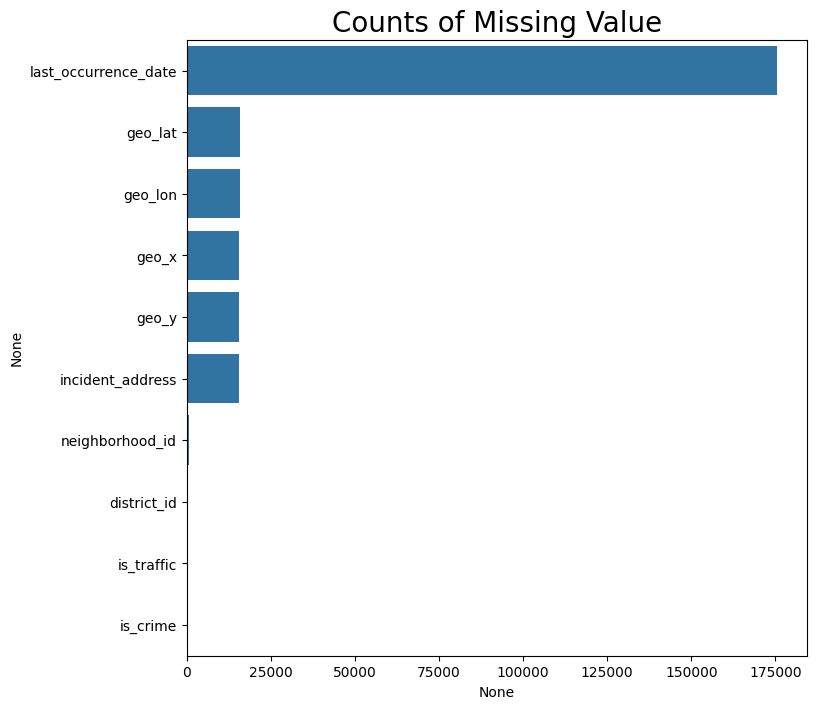

In [25]:
y=df.isnull().sum().sort_values(ascending=False)[:10].index
x=df.isnull().sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(8,8))
sns.barplot(x=x, y=y)
plt.title("Counts of Missing Value", size=20)


# Parametric Inference and Estimation

## Handeling missing values

There are various methods for handeling missing values here we only have 6 features that have missing values, we can use any of these methods:

Deletion: This method involves removing rows or columns with missing values from the dataset. While this approach is simple, it may lead to loss of valuable information, especially if the missing values are not randomly distributed.

Listwise deletion: Also known as complete case analysis, this involves removing entire rows with missing values.

Pairwise deletion: This method retains observations for analysis where data is complete, ignoring missing values in other variables.

Imputation: Imputation involves filling in missing values with estimated or calculated values.

Imputation methods include:

Mean, median, or mode imputation: Filling missing values with the mean, median, or mode of the respective variable. This method is simple but may not be appropriate if data is not normally distributed or if there are outliers.
Forward fill or backward fill: Propagating the last known value forward or backward to fill missing values in time-series data.
Interpolation: Estimating missing values based on the values of adjacent data points. Methods such as linear interpolation, polynomial interpolation, or spline interpolation can be used.
Predictive modeling: Using machine learning algorithms to predict missing values based on other variables in the dataset. Techniques such as K-nearest neighbors (KNN), decision trees, or regression can be employed for this purpose.
Flagging and filling: This approach involves creating an additional binary indicator variable to flag missing values in a particular variable and then imputing the missing values separately.

Domain-specific methods: In some cases, domain knowledge or specific characteristics of the data may suggest appropriate methods for handling missing values. For example, in time-series data, missing values may be imputed differently based on the nature of the time series.

Multiple imputation: This method involves generating multiple imputed datasets, each with different plausible values for the missing data, and then combining the results to provide more accurate estimates and uncertainty measures.

To address the missing values based on the guidelines provided:

Replacing last_occurrence_date with first_occurrence_date: Since last_occurrence_date has missing values, we'll replace them with the corresponding first_occurrence_date.

Ignoring geo_lat and geo_lon: We'll leave these columns unchanged.



### Last Occurance Date

In [26]:
# 1. Replace missing values in 'last_occurrence_date' with corresponding values from 'first_occurrence_date'
df['last_occurrence_date'].fillna(df['first_occurrence_date'], inplace=True)

# Optional: Confirm the changes
print(df.isna().sum())


incident_id                   0
offense_id                    0
offense_code                  0
offense_code_extension        0
offense_type_id               0
offense_category_id           0
first_occurrence_date         0
last_occurrence_date          0
reported_date                 0
incident_address          15503
geo_x                     15503
geo_y                     15503
geo_lon                   15769
geo_lat                   15769
district_id                  57
precinct_id                   0
neighborhood_id             689
is_crime                      0
is_traffic                    0
victim_count                  0
dtype: int64


### districtd_id

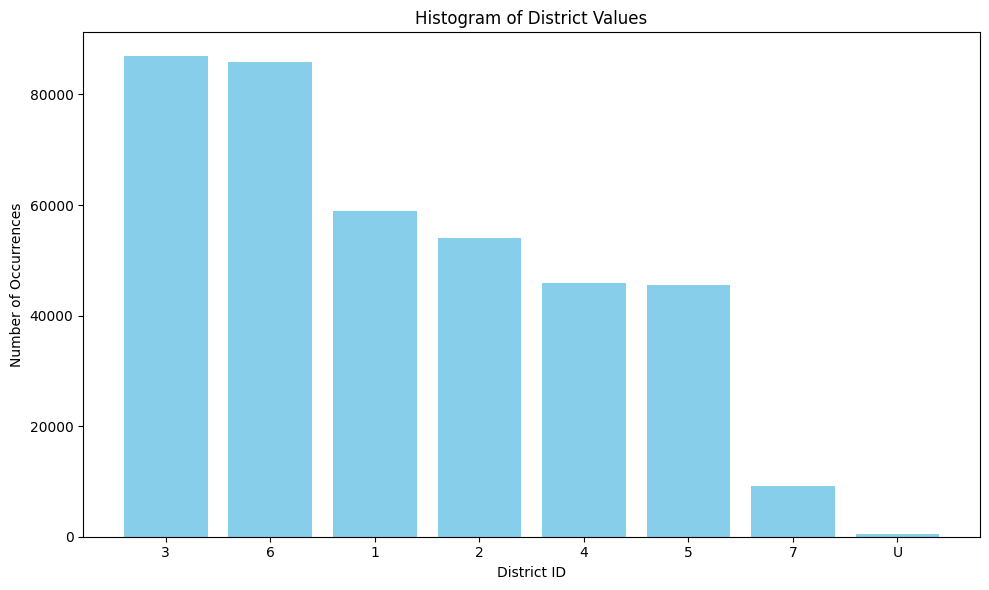

In [27]:
import matplotlib.pyplot as plt

# Group DataFrame by 'district_id' and count occurrences
district_counts = df['district_id'].value_counts()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(district_counts.index, district_counts.values, color='skyblue')
plt.xlabel('District ID')
plt.ylabel('Number of Occurrences')
plt.title('Histogram of District Values')
plt.tight_layout()
plt.show()


In [28]:
neighborhood_district_mapping = df.groupby(['precinct_id', 'district_id','neighborhood_id']).size().reset_index(name='count')

print(neighborhood_district_mapping.to_string())

     precinct_id district_id             neighborhood_id  count
0            111           1                    berkeley   3305
1            111           1                chaffee-park   1527
2            111           1                    highland     29
3            111           1                       regis   1879
4            111           1                   sunnyside   2539
5            111           1               west-highland     30
6            112           1                chaffee-park    283
7            112           1              elyria-swansea     39
8            112           1                  globeville   4419
9            112           1                    highland     40
10           112           1                       regis      1
11           112           1                   sunnyside   1761
12           112           1               west-highland      1
13           113           1                central-park      2
14           113           1            

Based on the information provided from the map (https://www.denvergov.org/content/dam/denvergov/Portals/720/documents/maps/Citywide_Map.pdf), it seems that the first digit of the precinct number indicates the district number. Additionally, precinct number 999 is not present, which likely indicates missing values.

It did not work since when the distcit number was misssing the precint number was missing too

In [29]:
import pandas as pd



# Check missing district_ids
missing_district_ids = df[df['district_id'].isnull()]

# Fill missing district_ids based on precinct_id
for index, row in missing_district_ids.iterrows():
    precinct_id = row['precinct_id']
    district_id = str(precinct_id)[0] if str(precinct_id)[0] != '9' else None
    df.at[index, 'district_id'] = district_id

# Check if there are any remaining missing values
missing_values = df.isnull().sum()
print(missing_values)


incident_id                   0
offense_id                    0
offense_code                  0
offense_code_extension        0
offense_type_id               0
offense_category_id           0
first_occurrence_date         0
last_occurrence_date          0
reported_date                 0
incident_address          15503
geo_x                     15503
geo_y                     15503
geo_lon                   15769
geo_lat                   15769
district_id                  57
precinct_id                   0
neighborhood_id             689
is_crime                      0
is_traffic                    0
victim_count                  0
dtype: int64


### geo_x and geo_y and geo_lat and geo_lon

In [30]:
# Group DataFrame by 'district_id' and calculate mean 'geo_x', 'geo_y', 'geo_lat', and 'geo_lon' for each district
district_means = df.groupby('district_id')[['geo_x', 'geo_y', 'geo_lat', 'geo_lon']].mean()

# Replace NaNs in 'geo_x', 'geo_y', 'geo_lat', and 'geo_lon' with district means
for district_id, mean_values in district_means.iterrows():
    district_mask = (df['district_id'] == district_id)
    df.loc[district_mask, 'geo_x'] = df.loc[district_mask, 'geo_x'].fillna(mean_values['geo_x'])
    df.loc[district_mask, 'geo_y'] = df.loc[district_mask, 'geo_y'].fillna(mean_values['geo_y'])
    df.loc[district_mask, 'geo_lat'] = df.loc[district_mask, 'geo_lat'].fillna(mean_values['geo_lat'])
    df.loc[district_mask, 'geo_lon'] = df.loc[district_mask, 'geo_lon'].fillna(mean_values['geo_lon'])

# Optional: Confirm the changes
print(df.isna().sum())


incident_id                   0
offense_id                    0
offense_code                  0
offense_code_extension        0
offense_type_id               0
offense_category_id           0
first_occurrence_date         0
last_occurrence_date          0
reported_date                 0
incident_address          15503
geo_x                         8
geo_y                         8
geo_lon                       8
geo_lat                       8
district_id                  57
precinct_id                   0
neighborhood_id             689
is_crime                      0
is_traffic                    0
victim_count                  0
dtype: int64


### incident_adress

In [31]:
df['incident_address'].fillna(df['district_id'].astype(str) + '_' + df['precinct_id'].astype(str) + '_' + df['neighborhood_id'].astype(str), inplace=True)
# Confirm the changes
print(df.isna().sum())


incident_id                 0
offense_id                  0
offense_code                0
offense_code_extension      0
offense_type_id             0
offense_category_id         0
first_occurrence_date       0
last_occurrence_date        0
reported_date               0
incident_address            0
geo_x                       8
geo_y                       8
geo_lon                     8
geo_lat                     8
district_id                57
precinct_id                 0
neighborhood_id           689
is_crime                    0
is_traffic                  0
victim_count                0
dtype: int64


In [32]:
def find_nearest_district(row):
    if pd.isna(row['district_id']):
        # Calculate Euclidean distances to all district means
        distances = np.sqrt(((district_means - row[['geo_x', 'geo_y', 'geo_lat', 'geo_lon']])**2).sum(axis=1))
        # Find the index of the district with the minimum distance
        nearest_district_index = distances.idxmin()
        # Return the district_id of the nearest district
        return nearest_district_index
    else:
        return row['district_id']

# Fill missing district_id with the nearest district
df['district_id'] = df.apply(find_nearest_district, axis=1)

# Optional: Confirm the changes
print(df.isna().sum())

incident_id                 0
offense_id                  0
offense_code                0
offense_code_extension      0
offense_type_id             0
offense_category_id         0
first_occurrence_date       0
last_occurrence_date        0
reported_date               0
incident_address            0
geo_x                       8
geo_y                       8
geo_lon                     8
geo_lat                     8
district_id                 0
precinct_id                 0
neighborhood_id           689
is_crime                    0
is_traffic                  0
victim_count                0
dtype: int64


In [33]:
import pandas as pd



# Replace missing values in 'neighborhood_id' column with 'unknown'
df['neighborhood_id'].fillna('unknown', inplace=True)

# Verify if there are any missing values left
print(df.isnull().sum())


incident_id               0
offense_id                0
offense_code              0
offense_code_extension    0
offense_type_id           0
offense_category_id       0
first_occurrence_date     0
last_occurrence_date      0
reported_date             0
incident_address          0
geo_x                     8
geo_y                     8
geo_lon                   8
geo_lat                   8
district_id               0
precinct_id               0
neighborhood_id           0
is_crime                  0
is_traffic                0
victim_count              0
dtype: int64


In [34]:
import pandas as pd

# Assuming your DataFrame is named df
df.dropna(inplace=True)

# Verify if there are any missing values left
print(df.isnull().sum())


incident_id               0
offense_id                0
offense_code              0
offense_code_extension    0
offense_type_id           0
offense_category_id       0
first_occurrence_date     0
last_occurrence_date      0
reported_date             0
incident_address          0
geo_x                     0
geo_y                     0
geo_lon                   0
geo_lat                   0
district_id               0
precinct_id               0
neighborhood_id           0
is_crime                  0
is_traffic                0
victim_count              0
dtype: int64


In [35]:


# Drop rows where the district_id is 'U'
df = df[df['district_id'] != 'U']

# Now 'df' will contain the DataFrame without rows where district_id is 'U'


## Data Visualization





In [36]:
# Convert `reported_date` to datetime format if it's not already.
df['reported_date'] = pd.to_datetime(df['reported_date'])

# Extract year, month, and day into separate columns.
df['reported_year'] = df['reported_date'].dt.year
df['reported_month'] = df['reported_date'].dt.month
df['reported_day'] = df['reported_date'].dt.day

# Extract the the hour (without minute).
df['reported_hour'] = df['reported_date'].dt.strftime('%H')   # Gets the hour in 24-hour format


# Display the DataFrame to check the new columns.
df.head()


incident_id        offense_id  offense_code  offense_code_extension  \
0    202268791   202268791299900          2999                       0   
1   2021387586  2021387586299900          2999                       0   
2   2020641486  2020641486299900          2999                       0   
3   2018612468  2018612468299900          2999                       0   
4   2020293614  2020293614299900          2999                       0   

           offense_type_id offense_category_id  first_occurrence_date  \
0  criminal-mischief-other     public-disorder   2/10/2022 2:50:00 AM   
1  criminal-mischief-other     public-disorder    7/7/2021 9:02:00 PM   
2  criminal-mischief-other     public-disorder  10/29/2020 1:30:00 AM   
3  criminal-mischief-other     public-disorder    9/6/2018 5:00:00 PM   
4  criminal-mischief-other     public-disorder    5/8/2020 5:00:00 AM   

    last_occurrence_date       reported_date     incident_address  ...  \
0   2/10/2022 2:50:00 AM 2022-02-10 03:16:00   1107 N SANTA FE DR  ...   
1    7/7/2021 9:02:00 PM 2021-07-08 00:55:00          815 16TH ST  ...   
2  10/29/2020 1:30:00 AM 2020-10-29 04:31:00  4745 N FEDERAL BLVD  ...   
3   9/6/2018 11:00:00 PM 2018-09-07 09:58:00    65 S FEDERAL BLVD  ...   
4    5/8/2020 6:30:00 PM 2020-05-13 10:00:00   12295 E ALBROOK DR  ...   

   district_id  precinct_id  neighborhood_id  is_crime is_traffic  \
0            1          123     lincoln-park         1          0   
1            6          611              cbd         1          0   
2            1          111         berkeley         1          0   
3            4          411           barnum         1          0   
4            5          521        montbello         1          0   

   victim_count reported_year  reported_month  reported_day  reported_hour  
0             1          2022               2            10             03  
1             1          2021               7             8             00  
2             1          2020              10            29             04  
3             1          2018               9             7             09  
4             1          2020               5            13             10  

[5 rows x 24 columns]

### with 2023

<ipython-input-37-f8e83d414ff8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='offense_category_id', data=top_crimes_df, order=top_crimes_df['offense_category_id'].value_counts().index, palette='bright')


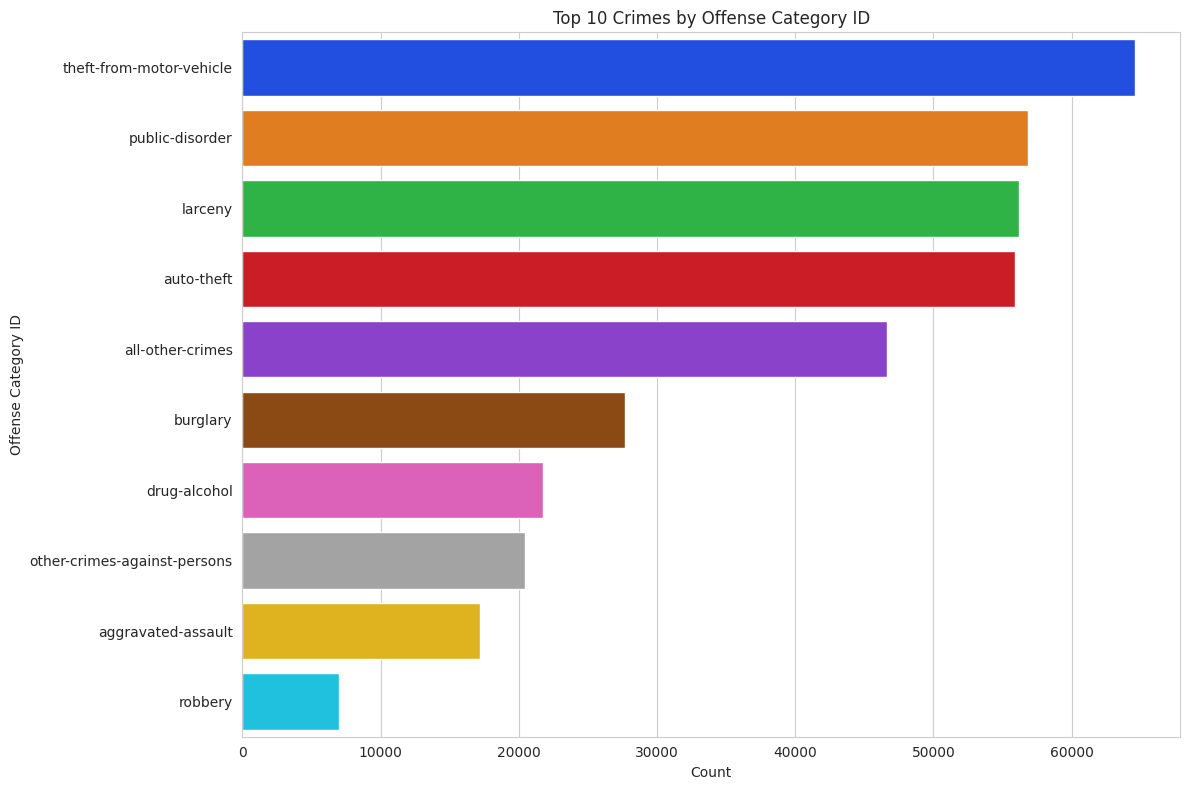

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set seaborn style
sns.set_style("whitegrid")
# Get the top 10 crimes by 'offense_category_id'
top_crimes = df['offense_category_id'].value_counts().head(10).index

# Filter the DataFrame to only include top 10 crimes
top_crimes_df = df[df['offense_category_id'].isin(top_crimes)]

# Plot the count of top 10 crimes using a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.countplot(y='offense_category_id', data=top_crimes_df, order=top_crimes_df['offense_category_id'].value_counts().index, palette='bright')
plt.title('Top 10 Crimes by Offense Category ID')
plt.xlabel('Count')
plt.ylabel('Offense Category ID')
plt.tight_layout()
plt.show()





In [38]:
top_crimes

Index(['theft-from-motor-vehicle', 'public-disorder', 'larceny', 'auto-theft',
       'all-other-crimes', 'burglary', 'drug-alcohol',
       'other-crimes-against-persons', 'aggravated-assault', 'robbery'],
      dtype='object')

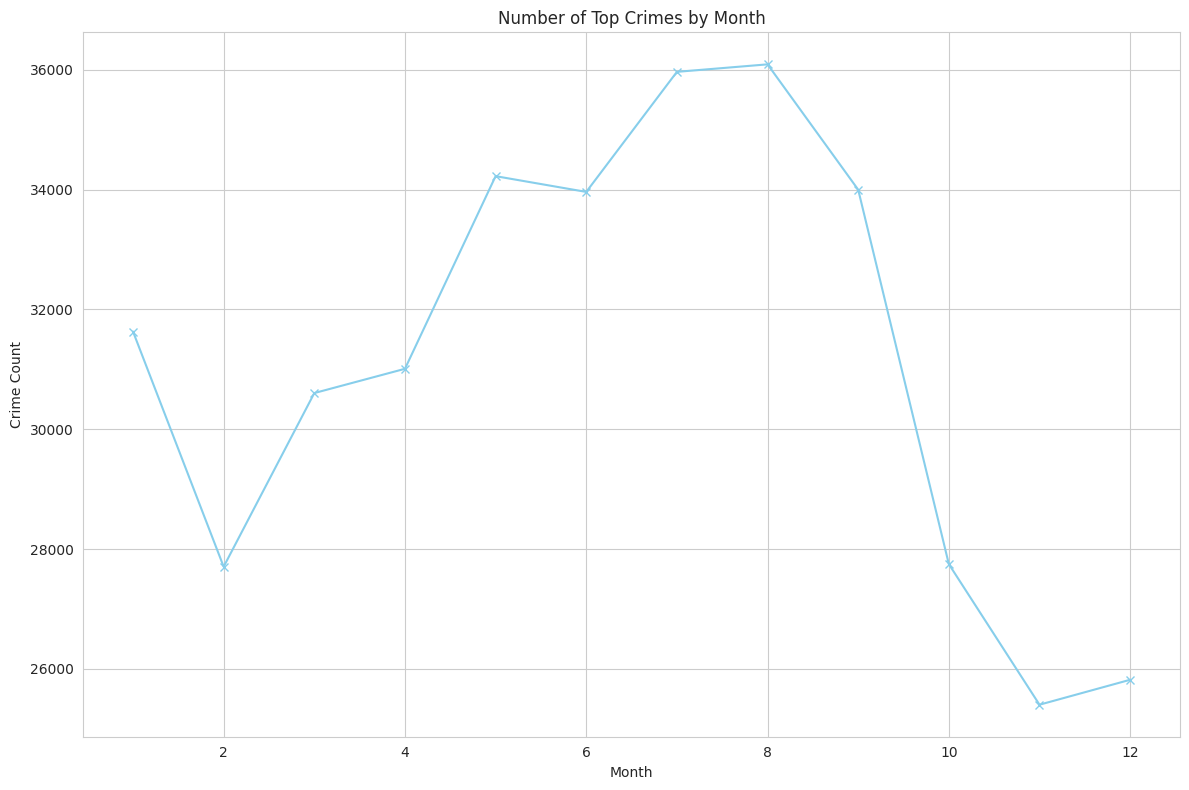

In [39]:
# Plot the number of crimes by month using a line plot
plt.figure(figsize=(12, 8))
monthly_crime_counts = top_crimes_df.groupby('reported_month').size()
monthly_crime_counts.plot(color='skyblue', marker='x')
plt.title('Number of Top Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.grid(True)
plt.tight_layout()
plt.show()




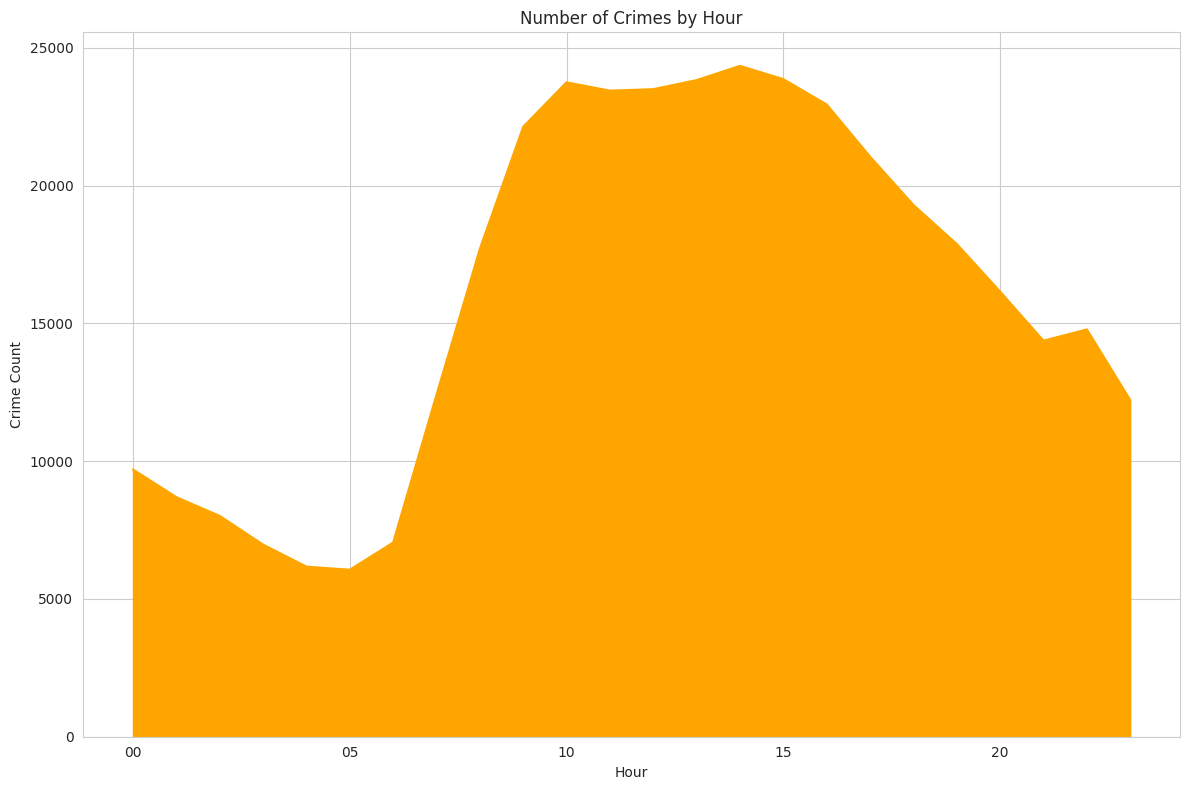

In [40]:

# Plot the number of crimes by hour using a area plot
plt.figure(figsize=(12, 8))
hourly_crime_counts = df.groupby('reported_hour').size()
hourly_crime_counts.plot(kind='area', color='orange')
plt.title('Number of Crimes by Hour')
plt.xlabel('Hour')
plt.ylabel('Crime Count')
plt.grid(True)
plt.tight_layout()
plt.show()


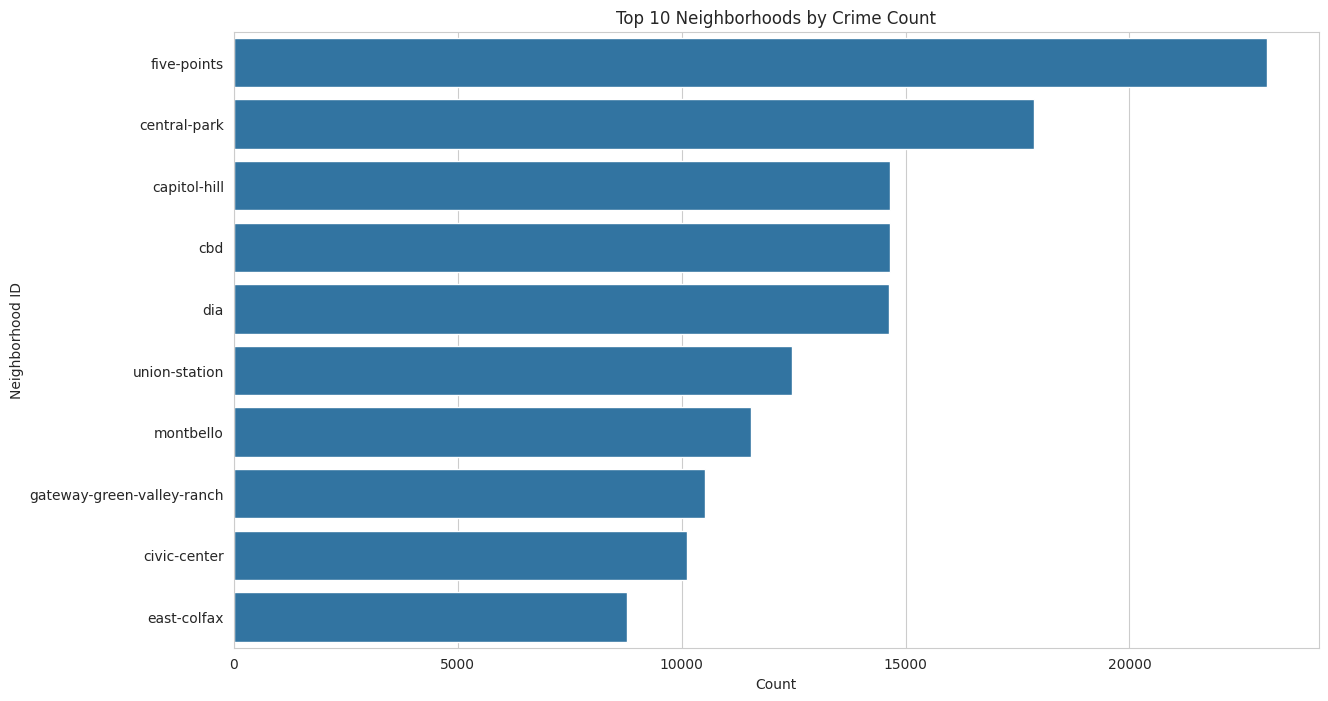

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Count Plot for 'neighborhood_id' and 'offense_category_id'
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='neighborhood_id', order=df['neighborhood_id'].value_counts().index[:10])
plt.title('Top 10 Neighborhoods by Crime Count')
plt.xlabel('Count')
plt.ylabel('Neighborhood ID')
plt.show()




<ipython-input-42-7bb45a20e25f>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = neighborhood_category_counts.pivot('neighborhood_id', 'offense_category_id', 'counts')


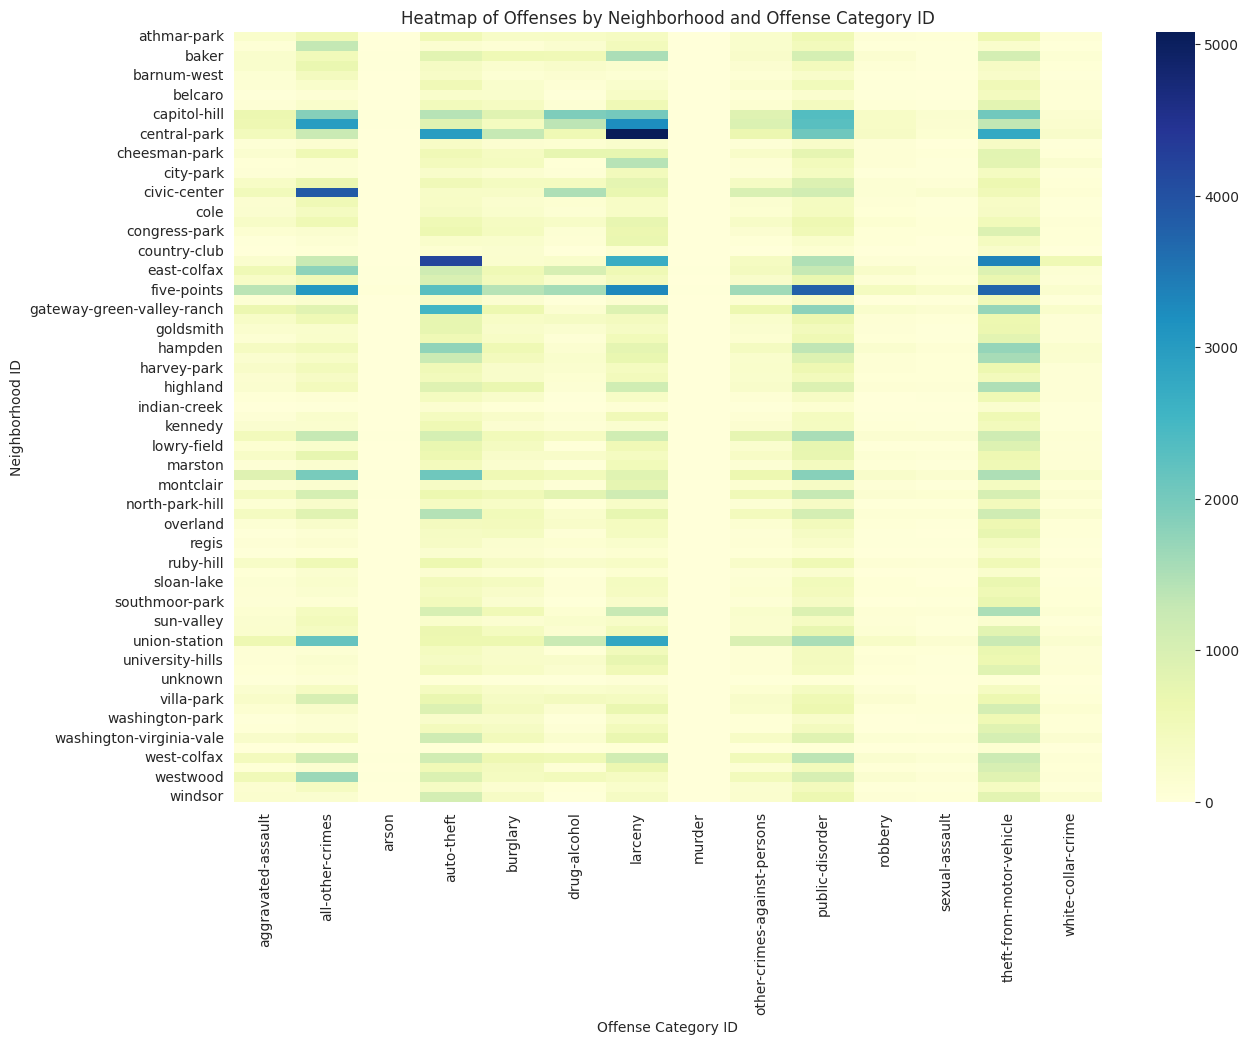

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the counts for each neighborhood and category
neighborhood_category_counts = df.groupby(['neighborhood_id', 'offense_category_id']).size().reset_index(name='counts')

# Pivot the DataFrame to get the proper format for the heatmap
heatmap_data = neighborhood_category_counts.pivot('neighborhood_id', 'offense_category_id', 'counts')

# Fill NaN values with 0, which indicates no offenses recorded for that category in the neighborhood
heatmap_data = heatmap_data.fillna(0)

# Create the heatmap
plt.figure(figsize=(14, 10))  # You might need to adjust the figure size depending on the number of neighborhoods and categories
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu")  # Set `annot=True` if you want to see the counts
plt.title('Heatmap of Offenses by Neighborhood and Offense Category ID')
plt.xlabel('Offense Category ID')
plt.ylabel('Neighborhood ID')
plt.show()


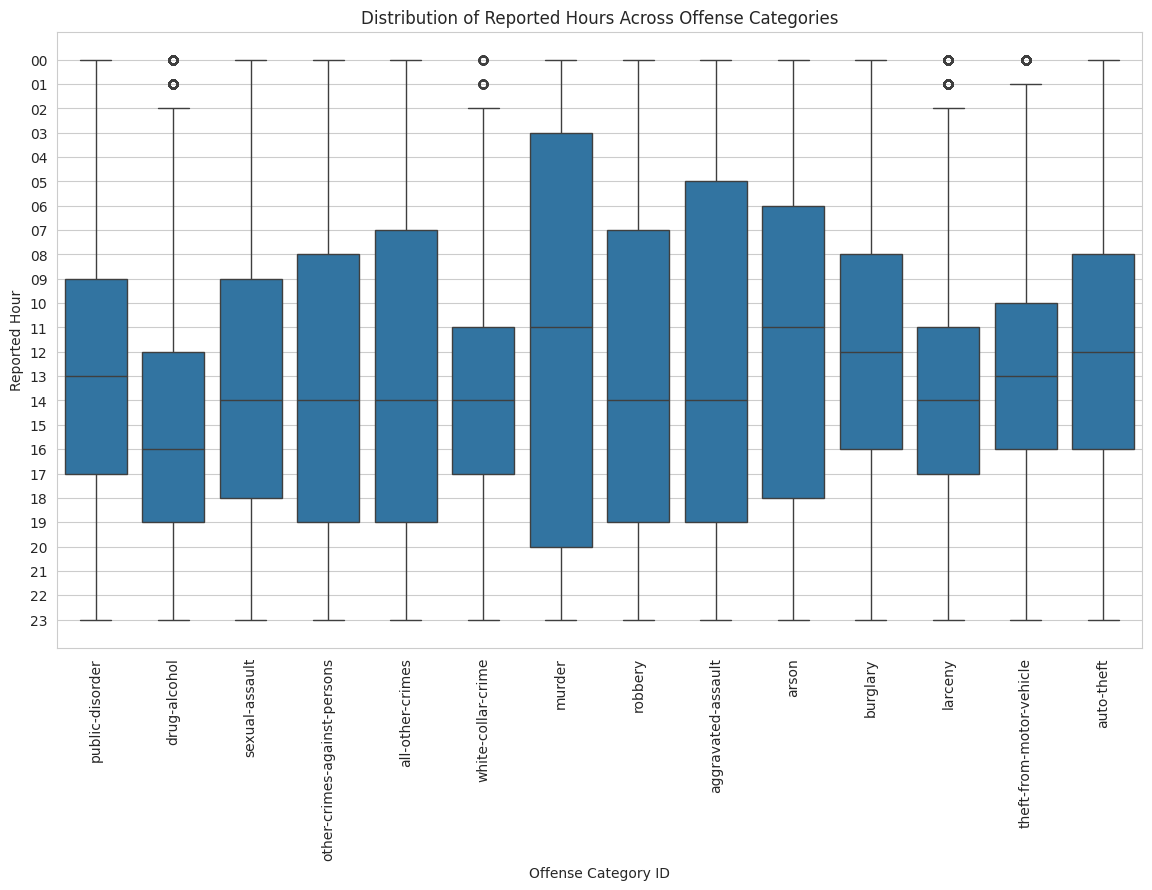

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'reported_hour' is not already a string, then convert it
if not isinstance(df['reported_hour'].iloc[0], str):
    df['reported_hour_str'] = df['reported_hour'].apply(lambda x: f'{x:02d}')  # Add leading zeros for sorting
else:
    df['reported_hour_str'] = df['reported_hour']

df['reported_hour_str'] = pd.Categorical(df['reported_hour_str'], categories=[f'{i:02d}' for i in range(24)], ordered=True)

# Now create the box plot with the ordered 'reported_hour_str'
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='offense_category_id', y='reported_hour_str')
plt.xticks(rotation=90)
plt.title('Distribution of Reported Hours Across Offense Categories')
plt.xlabel('Offense Category ID')
plt.ylabel('Reported Hour')
plt.show()


<ipython-input-44-e72ddb746106>:25: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  normalized_data_pivoted = normalized_data.pivot('reported_month', 'offense_category_id', 'normalized_counts')


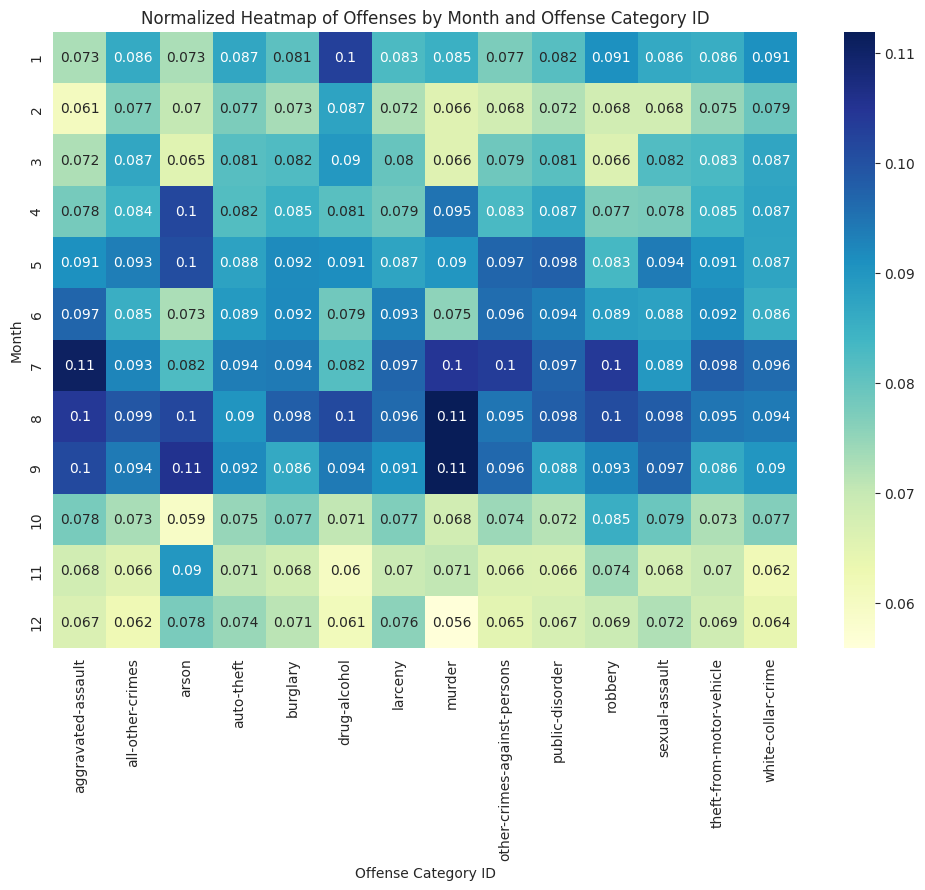

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'reported_month' is already extracted
# Convert 'reported_date' to datetime if not already done
# df['reported_date'] = pd.to_datetime(df['reported_date'])
# Extract month from 'reported_date'
# df['reported_month'] = df['reported_date'].dt.month

# Calculate the total counts for each 'offense_category_id' across all months
total_counts = df['offense_category_id'].value_counts().reset_index()
total_counts.columns = ['offense_category_id', 'total_counts']

# Calculate the counts for each month and category
monthly_counts = df.groupby(['reported_month', 'offense_category_id']).size().reset_index(name='monthly_counts')

# Merge the total counts with the monthly counts
normalized_data = pd.merge(monthly_counts, total_counts, on='offense_category_id')

# Normalize the monthly counts by the total counts for each category
normalized_data['normalized_counts'] = normalized_data['monthly_counts'] / normalized_data['total_counts']

# Pivot the DataFrame to get the proper format for the heatmap
normalized_data_pivoted = normalized_data.pivot('reported_month', 'offense_category_id', 'normalized_counts')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_data_pivoted, annot=True, cmap="YlGnBu")
plt.title('Normalized Heatmap of Offenses by Month and Offense Category ID')
plt.xlabel('Offense Category ID')
plt.ylabel('Month')
plt.show()


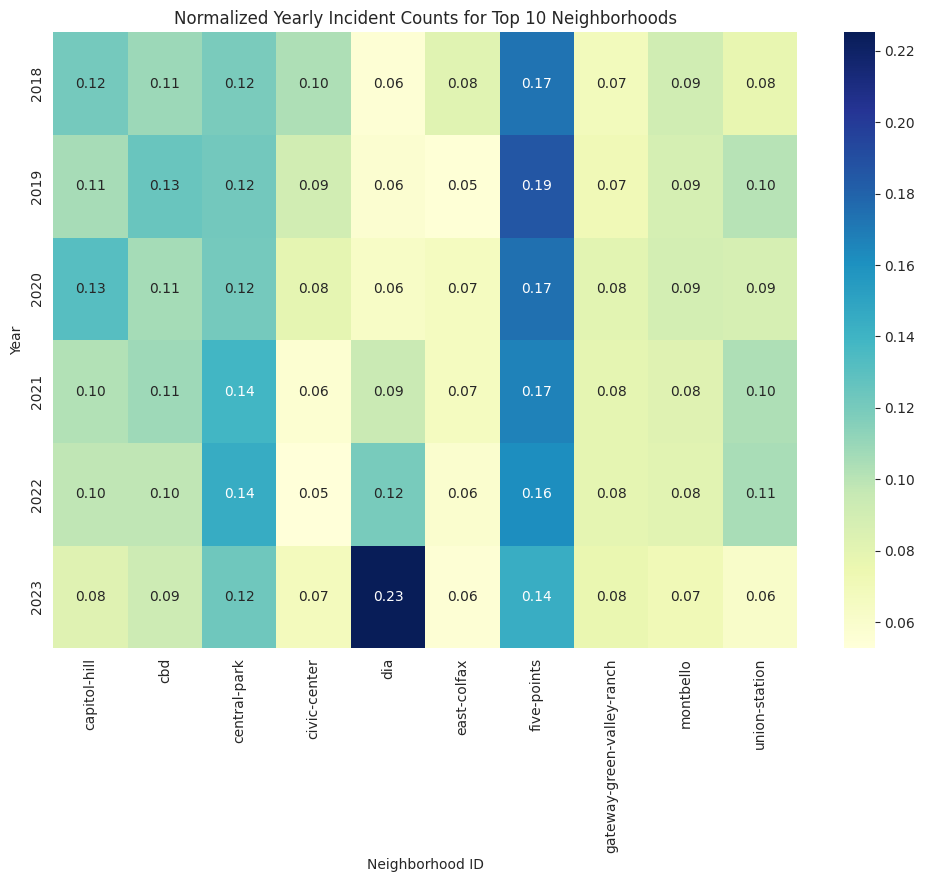

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Get top 10 neighborhoods based on count
top_neighborhoods = df['neighborhood_id'].value_counts().nlargest(10).index

# Filter data for top 10 neighborhoods
top_neighborhoods_df = df[df['neighborhood_id'].isin(top_neighborhoods)]

# Create a new DataFrame for the heatmap
year_neighborhood_counts = top_neighborhoods_df.groupby(['reported_year', 'neighborhood_id']).size().unstack(fill_value=0)

# Normalize the data by dividing each cell by the sum of its row (year)
year_neighborhood_counts_normalized = year_neighborhood_counts.div(year_neighborhood_counts.sum(axis=1), axis=0)

# Create heatmap for Year vs Top 10 Neighborhoods with normalized data
plt.figure(figsize=(12, 8))
sns.heatmap(year_neighborhood_counts_normalized, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Normalized Yearly Incident Counts for Top 10 Neighborhoods')
plt.xlabel('Neighborhood ID')
plt.ylabel('Year')
plt.show()


In [46]:
df["reported_date"].max()

Timestamp('2023-10-03 22:12:00')

### Without 2023

In [47]:
df = df[df['reported_year'] != 2023]

<ipython-input-48-f8e83d414ff8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='offense_category_id', data=top_crimes_df, order=top_crimes_df['offense_category_id'].value_counts().index, palette='bright')


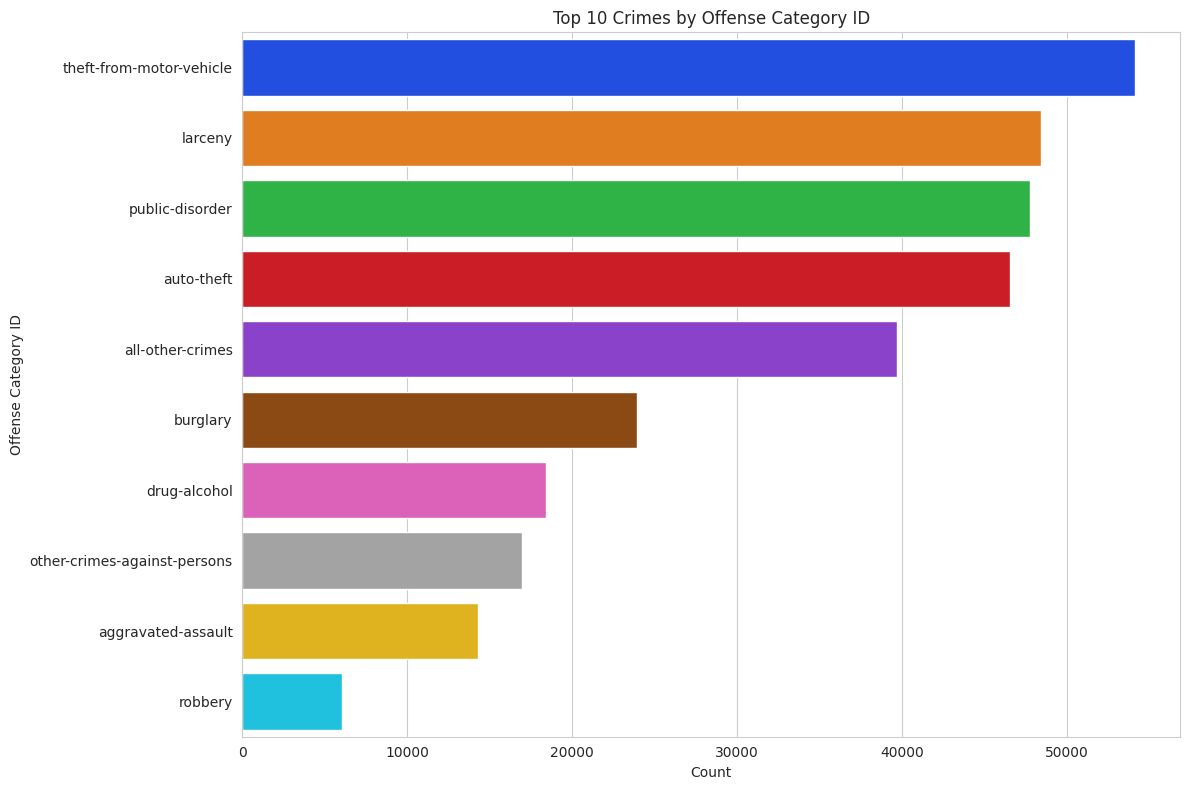

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set seaborn style
sns.set_style("whitegrid")
# Get the top 10 crimes by 'offense_category_id'
top_crimes = df['offense_category_id'].value_counts().head(10).index

# Filter the DataFrame to only include top 10 crimes
top_crimes_df = df[df['offense_category_id'].isin(top_crimes)]

# Plot the count of top 10 crimes using a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.countplot(y='offense_category_id', data=top_crimes_df, order=top_crimes_df['offense_category_id'].value_counts().index, palette='bright')
plt.title('Top 10 Crimes by Offense Category ID')
plt.xlabel('Count')
plt.ylabel('Offense Category ID')
plt.tight_layout()
plt.show()





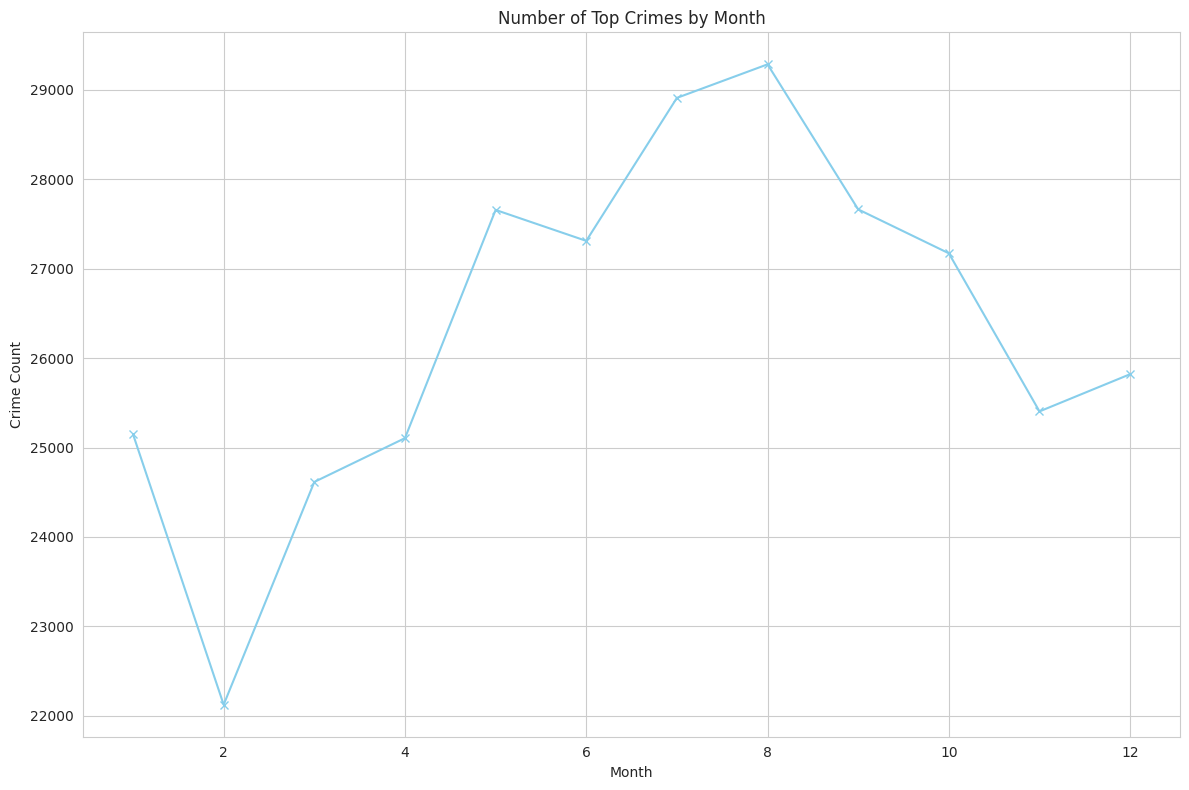

In [49]:
# Plot the number of crimes by month using a line plot
plt.figure(figsize=(12, 8))
monthly_crime_counts = top_crimes_df.groupby('reported_month').size()
monthly_crime_counts.plot(color='skyblue', marker='x')
plt.title('Number of Top Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.grid(True)
plt.tight_layout()
plt.show()




<ipython-input-50-f05ea3ed1dc7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reported_year', data=top_crimes_df ,  palette='husl')


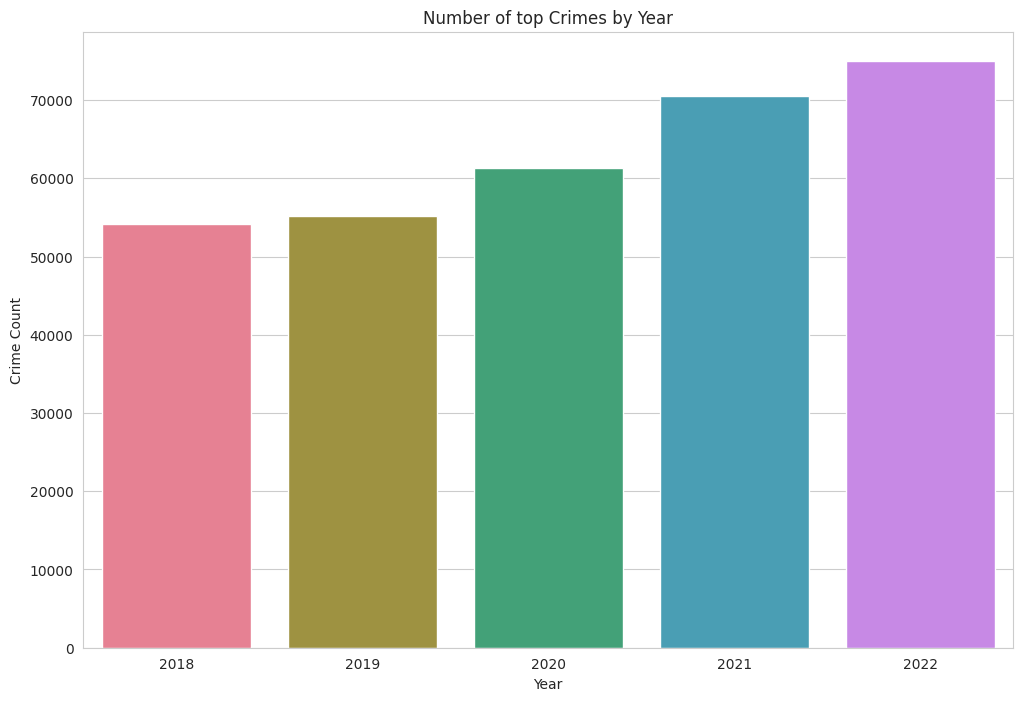

In [50]:
# Plot the number of crimes by year
plt.figure(figsize=(12, 8))
sns.countplot(x='reported_year', data=top_crimes_df ,  palette='husl')
plt.title('Number of top Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()

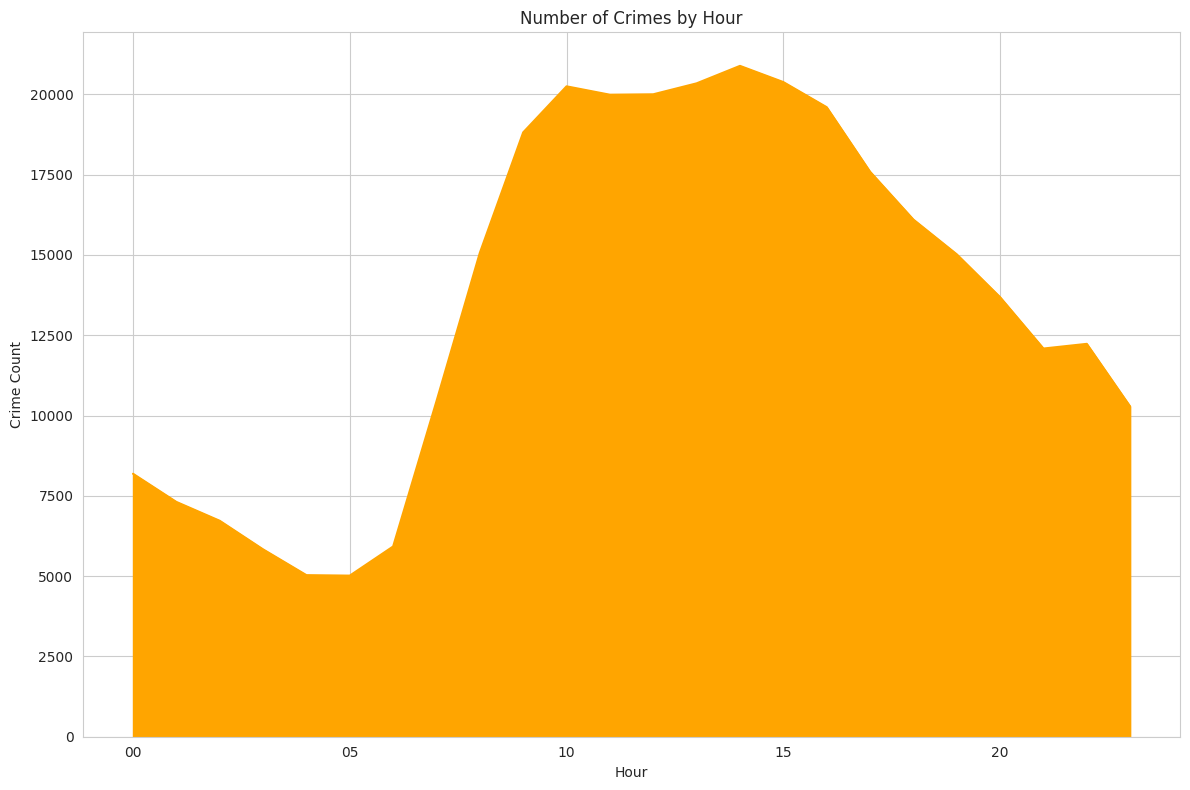

In [51]:

# Plot the number of crimes by hour using a area plot
plt.figure(figsize=(12, 8))
hourly_crime_counts = df.groupby('reported_hour').size()
hourly_crime_counts.plot(kind='area', color='orange')
plt.title('Number of Crimes by Hour')
plt.xlabel('Hour')
plt.ylabel('Crime Count')
plt.grid(True)
plt.tight_layout()
plt.show()


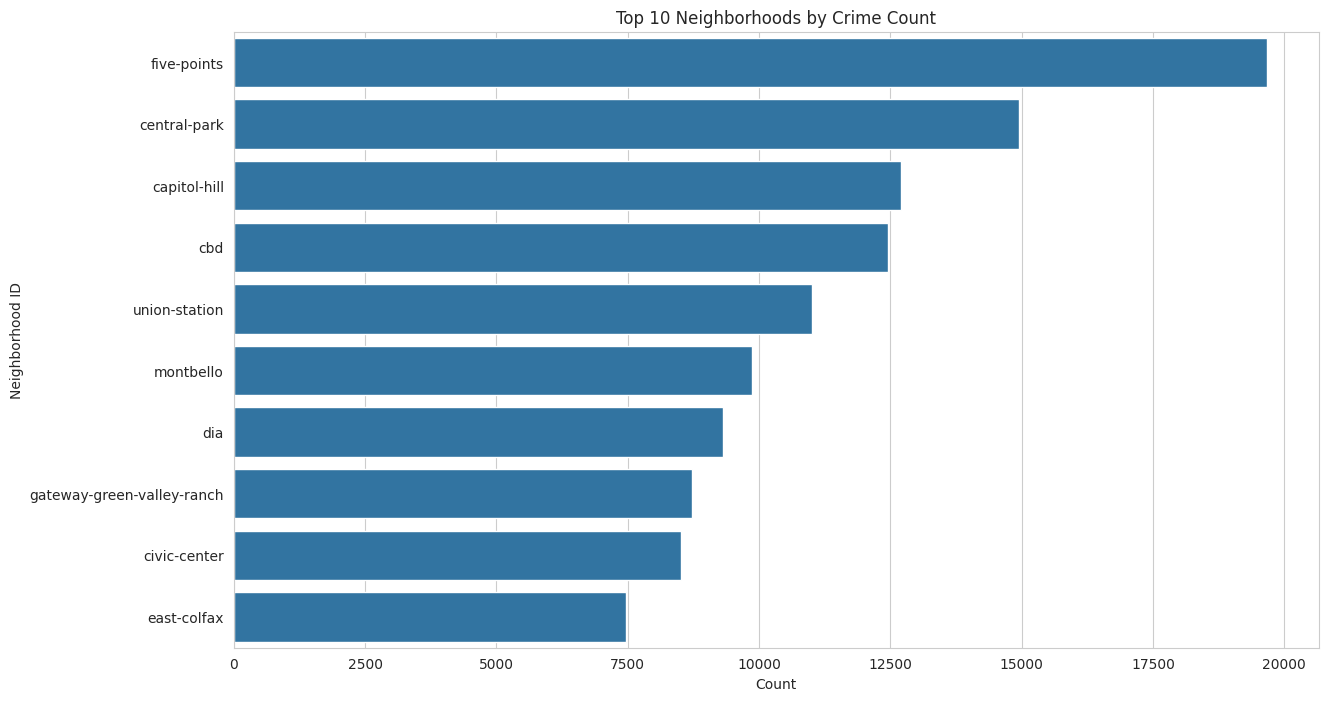

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Count Plot for 'neighborhood_id' and 'offense_category_id'
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='neighborhood_id', order=df['neighborhood_id'].value_counts().index[:10])
plt.title('Top 10 Neighborhoods by Crime Count')
plt.xlabel('Count')
plt.ylabel('Neighborhood ID')
plt.show()




<ipython-input-53-72956c23c59d>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = neighborhood_category_counts.pivot('neighborhood_id', 'offense_category_id', 'counts')


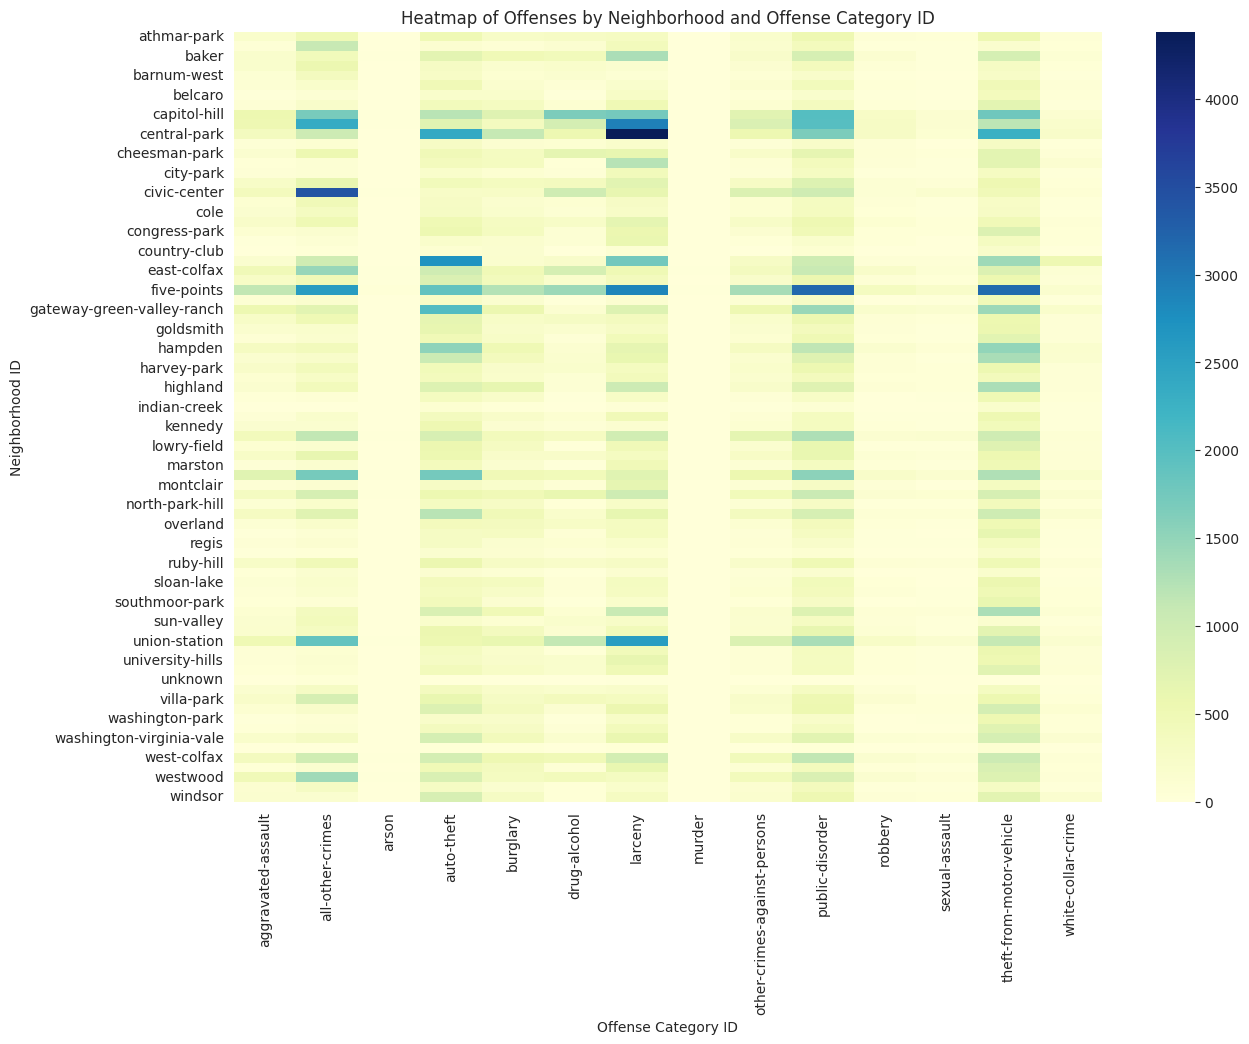

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the counts for each neighborhood and category
neighborhood_category_counts = df.groupby(['neighborhood_id', 'offense_category_id']).size().reset_index(name='counts')

# Pivot the DataFrame to get the proper format for the heatmap
heatmap_data = neighborhood_category_counts.pivot('neighborhood_id', 'offense_category_id', 'counts')

# Fill NaN values with 0, which indicates no offenses recorded for that category in the neighborhood
heatmap_data = heatmap_data.fillna(0)

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu")  # Set `annot=True` if you want to see the counts
plt.title('Heatmap of Offenses by Neighborhood and Offense Category ID')
plt.xlabel('Offense Category ID')
plt.ylabel('Neighborhood ID')
plt.show()


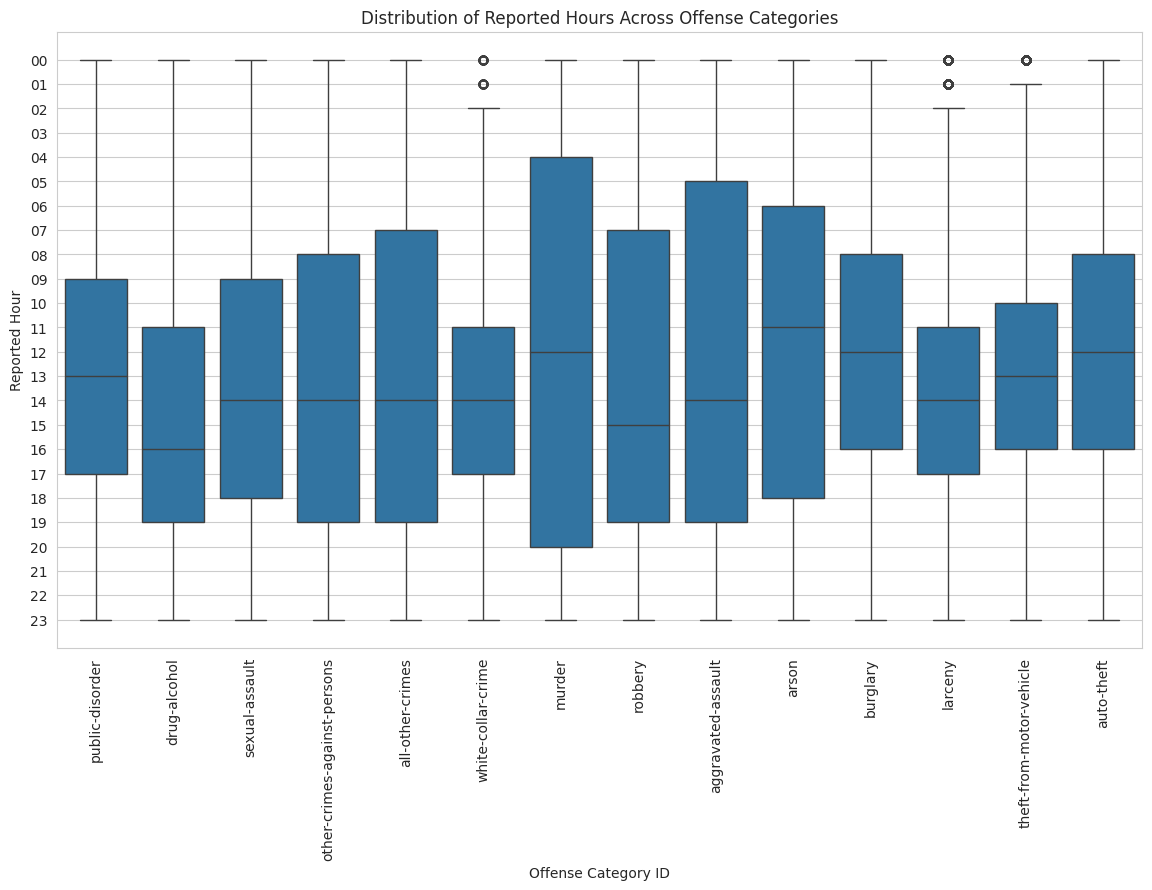

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'reported_hour' is not already a string, then convert it
if not isinstance(df['reported_hour'].iloc[0], str):
    df['reported_hour_str'] = df['reported_hour'].apply(lambda x: f'{x:02d}')  # Add leading zeros for sorting
else:
    df['reported_hour_str'] = df['reported_hour']

df['reported_hour_str'] = pd.Categorical(df['reported_hour_str'], categories=[f'{i:02d}' for i in range(24)], ordered=True)

# Now create the box plot with the ordered 'reported_hour_str'
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='offense_category_id', y='reported_hour_str')
plt.xticks(rotation=90)
plt.title('Distribution of Reported Hours Across Offense Categories')
plt.xlabel('Offense Category ID')
plt.ylabel('Reported Hour')
plt.show()


<ipython-input-55-e3b3ed144da2>:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  normalized_data_pivoted = normalized_data.pivot('reported_month', 'offense_category_id', 'normalized_counts')


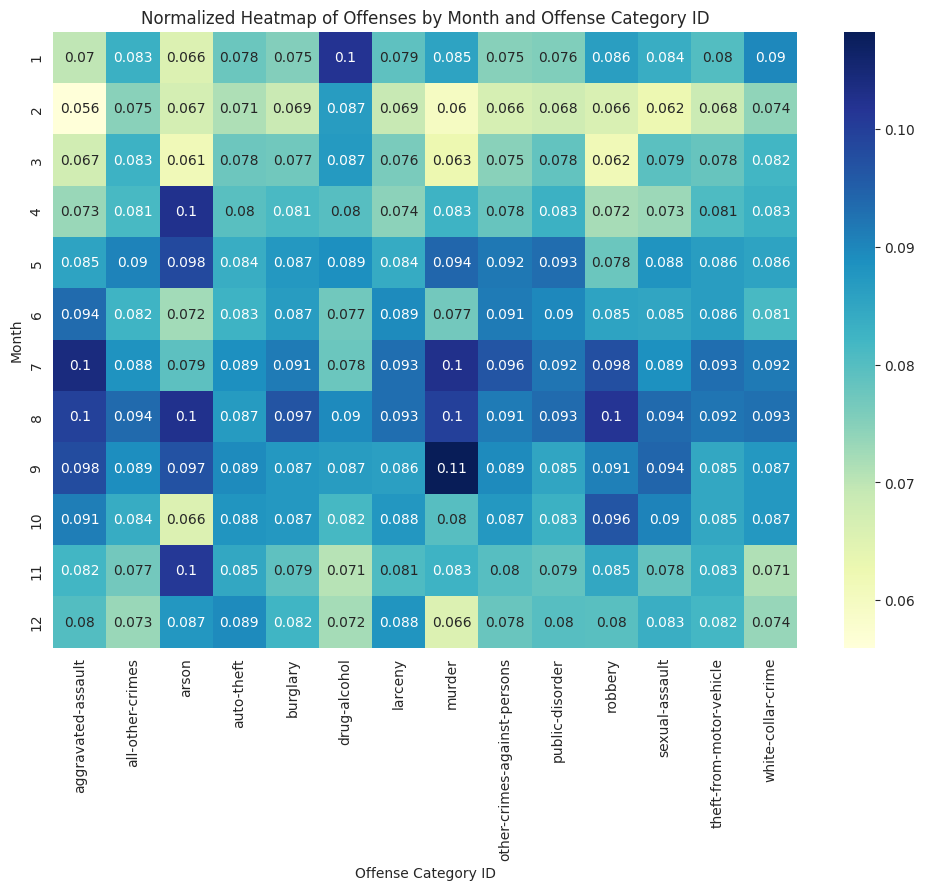

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the total counts for each 'offense_category_id' across all months
total_counts = df['offense_category_id'].value_counts().reset_index()
total_counts.columns = ['offense_category_id', 'total_counts']

# Calculate the counts for each month and category
monthly_counts = df.groupby(['reported_month', 'offense_category_id']).size().reset_index(name='monthly_counts')

# Merge the total counts with the monthly counts
normalized_data = pd.merge(monthly_counts, total_counts, on='offense_category_id')

# Normalize the monthly counts by the total counts for each category
normalized_data['normalized_counts'] = normalized_data['monthly_counts'] / normalized_data['total_counts']

# Pivot the DataFrame to get the proper format for the heatmap
normalized_data_pivoted = normalized_data.pivot('reported_month', 'offense_category_id', 'normalized_counts')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_data_pivoted, annot=True, cmap="YlGnBu")
plt.title('Normalized Heatmap of Offenses by Month and Offense Category ID')
plt.xlabel('Offense Category ID')
plt.ylabel('Month')
plt.show()


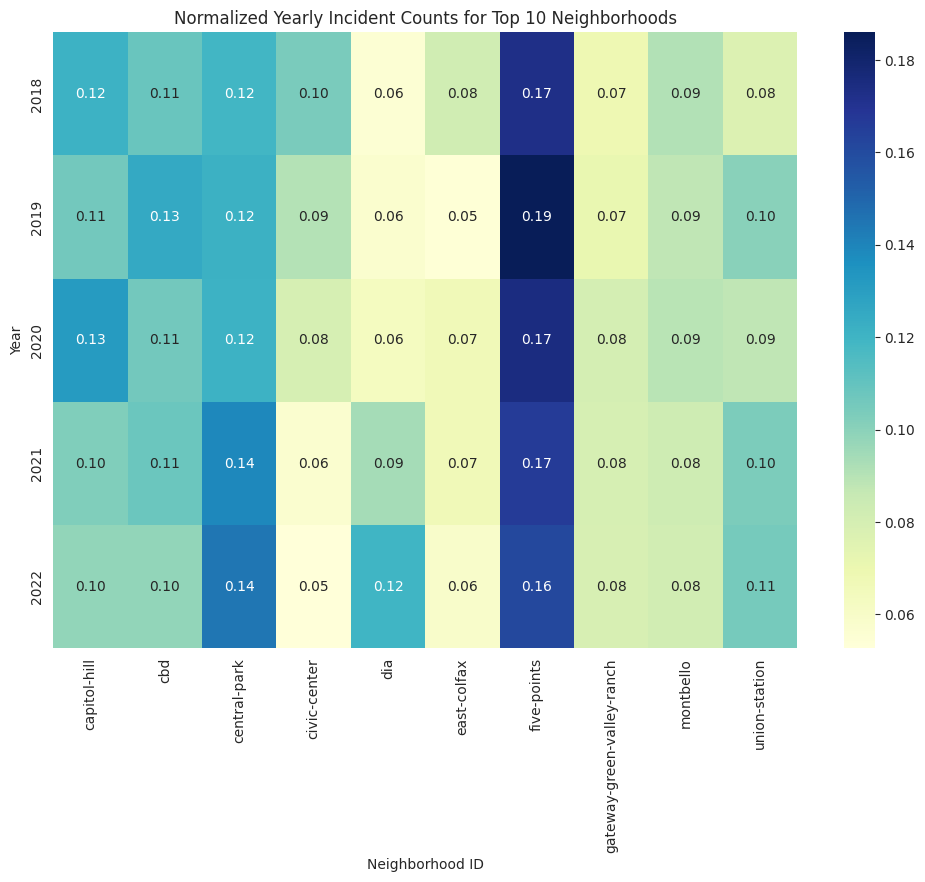

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Get top 10 neighborhoods based on count
top_neighborhoods = df['neighborhood_id'].value_counts().nlargest(10).index

# Filter data for top 10 neighborhoods
top_neighborhoods_df = df[df['neighborhood_id'].isin(top_neighborhoods)]

# Create a new DataFrame for the heatmap
year_neighborhood_counts = top_neighborhoods_df.groupby(['reported_year', 'neighborhood_id']).size().unstack(fill_value=0)

# Normalize the data by dividing each cell by the sum of its row (year)
year_neighborhood_counts_normalized = year_neighborhood_counts.div(year_neighborhood_counts.sum(axis=1), axis=0)

# Create heatmap for Year vs Top 10 Neighborhoods with normalized data
plt.figure(figsize=(12, 8))
sns.heatmap(year_neighborhood_counts_normalized, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Normalized Yearly Incident Counts for Top 10 Neighborhoods')
plt.xlabel('Neighborhood ID')
plt.ylabel('Year')
plt.show()


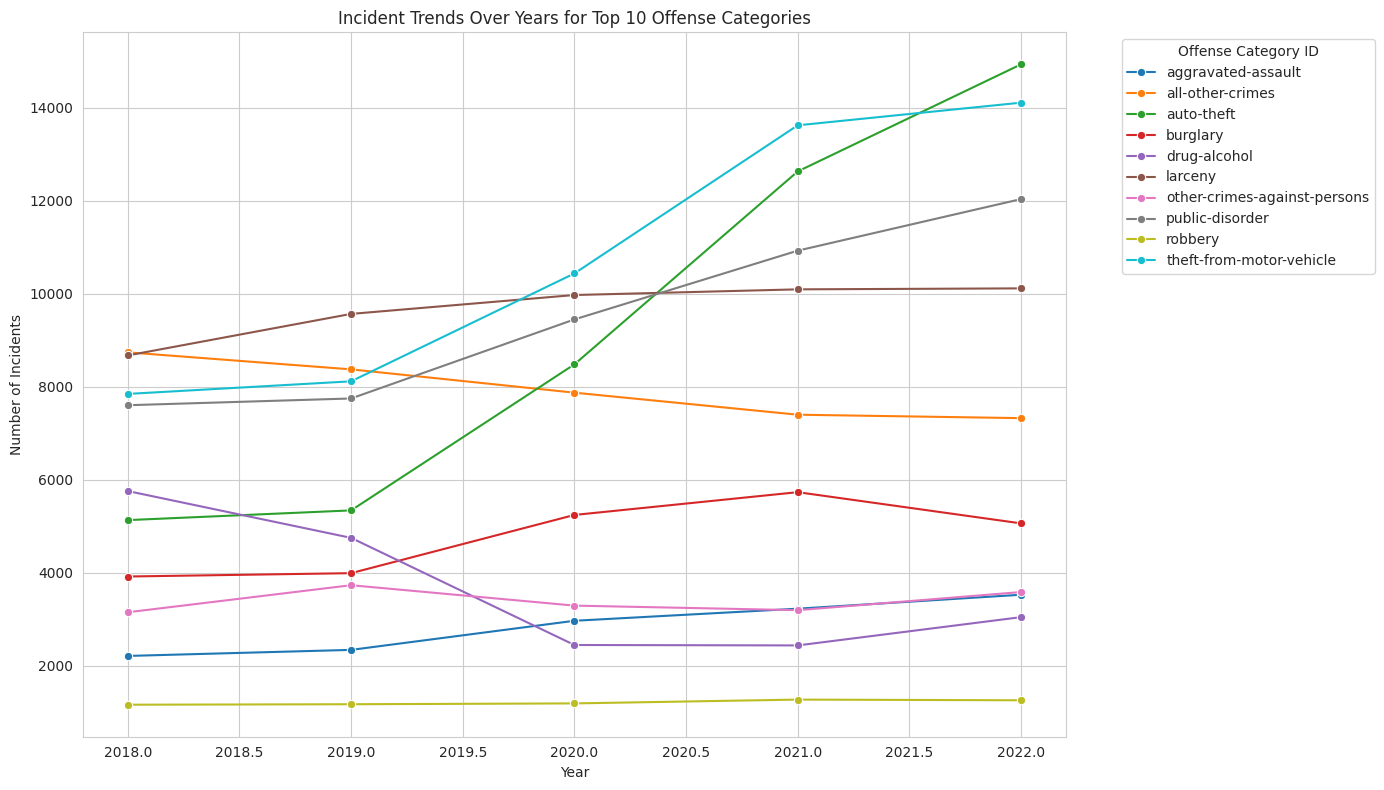

In [57]:
# Aggregate data to get counts per year for each offense category
yearly_counts_offense = df.groupby(['reported_year', 'offense_category_id']).size().reset_index(name='count')

# Filter to top 10 offense categories based on overall counts
top_offense_categories = df['offense_category_id'].value_counts().head(10).index
yearly_counts_offense_top = yearly_counts_offense[yearly_counts_offense['offense_category_id'].isin(top_offense_categories)]

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_counts_offense_top, x='reported_year', y='count', hue='offense_category_id', marker='o')
plt.title('Incident Trends Over Years for Top 10 Offense Categories')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Offense Category ID', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


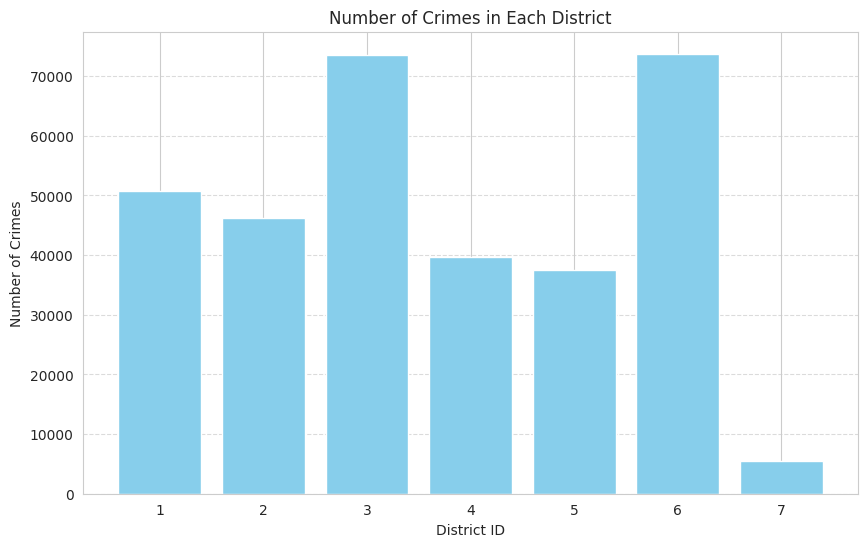

In [58]:
import matplotlib.pyplot as plt


# 'district_id' represents the district information

# Group the DataFrame by district and count the occurrences of crimes
crime_counts_per_district = df.groupby('district_id')['is_crime'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(crime_counts_per_district.index, crime_counts_per_district.values, color='skyblue')
plt.xlabel('District ID')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes in Each District')
plt.xticks(crime_counts_per_district.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


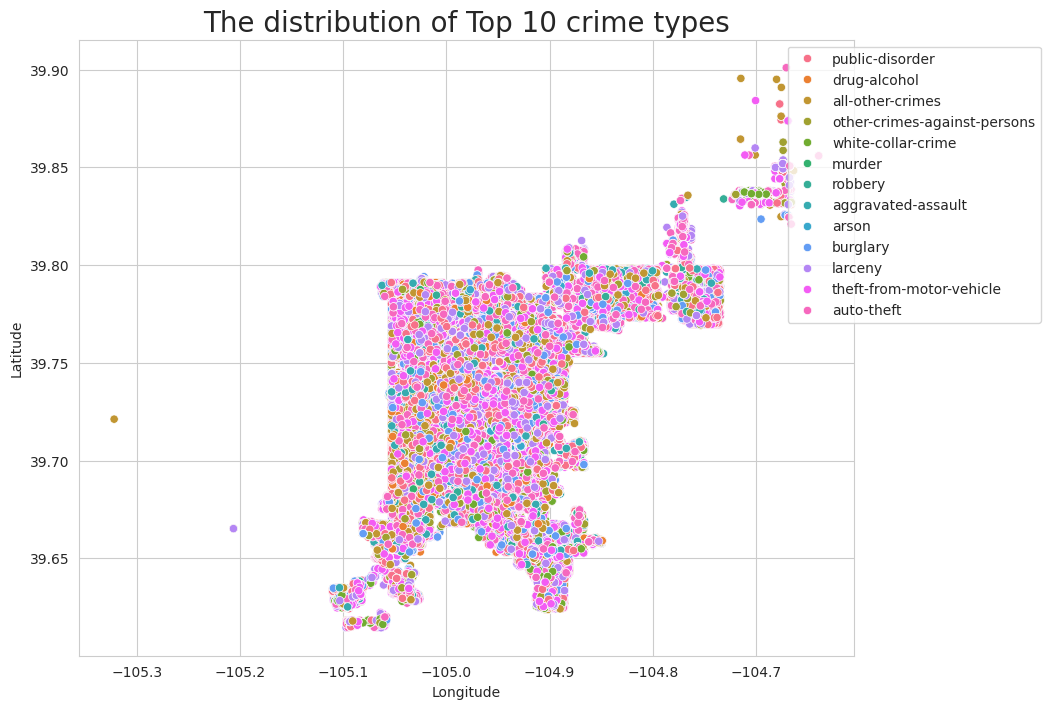

In [81]:

import matplotlib.pyplot as plt
import seaborn as sns

# Filter out outliers with latitude and longitude both equal to zero
df_filtered = df[(df['geo_lon'] < 0) & (df['geo_lat'] > 35)]

Top10_crime_type=df[df['offense_category_id'].isin(list(df.offense_category_id.value_counts()[:10].index[:10]))]
plt.figure(figsize=(10, 8))

# Create the scatter plot using the filtered data
sns.scatterplot(x="geo_lon", y="geo_lat", hue="offense_category_id", data=df_filtered)

# Add legend with smaller fontsize and adjust box size
plt.legend(loc='upper right', fontsize=10,bbox_to_anchor=(1.25, 1))

# Set title
plt.title("The distribution of Top 10 crime types", size=20)

# Set labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()


In [62]:
len(df)

326827

In [60]:
import folium
from folium import plugins

# Selecting first 2000 rows of data
data_2000 = df[:2000]

# Calculating mean longitude and latitude
Long = data_2000['geo_lon'].mean()
Lat = data_2000['geo_lat'].mean()

# Creating a folium map
data_map = folium.Map(location=[Lat, Long], zoom_start=12)

# Adding MarkerCluster plugin to the map
data_crime_map = plugins.MarkerCluster().add_to(data_map)

# Adding markers to the MarkerCluster
for lat, lon, label in zip(data_2000['geo_lat'], data_2000['geo_lon'], data_2000['offense_category_id']):
    folium.Marker(location=[lat, lon], popup=label).add_to(data_crime_map)

# Adding MarkerCluster to the map
data_map.add_child(data_crime_map)

# Displaying the map
data_map


# Hypothesis Testing and Statistical Analysis

In [ ]:
import pandas as pd

# Specify the sample size
sample_size = 100  # Adjust this as needed

# Randomly sample the DataFrame
df = df.sample(n=sample_size, random_state=42)  # Setting random_state for reproducibility




## Hypothesis one:


In [ ]:
df.to_csv('Crimes.csv', index=False)

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Load your data

# Create a contingency table
contingency_table = pd.crosstab(df['neighborhood_id'], df['offense_category_id'])

# Conduct the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}, p-value: {p}")


Chi-square statistic: 589.6473326868063, p-value: 0.337768503323816


## Hypothesis two:

In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Compute Pearson correlation
correlation, p_value = pearsonr(df['geo_x'], df['geo_y'])

print(f"Pearson correlation coefficient: {correlation}, p-value: {p_value}")


Pearson correlation coefficient: 0.3519457832830657, p-value: 0.00032965265812730634


## Hypothesis thire:

In [ ]:
import pandas as pd
from scipy import stats

# Assuming 'data' is your DataFrame and it's already loaded with 'district_id' and 'victim_count'

# Convert district_id to a categorical variable if it's not already
df['district_id'] = df['district_id'].astype('category')

# Group data by 'district_id' and collect 'victim_count' for each group
groups = [group['victim_count'].values for _, group in df.groupby('district_id')]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_statistic}, p-value: {p_value}")


F-statistic: 1.12375, p-value: 0.3546814502760903


## Hypothesis Four:



In [ ]:
import pandas as pd
from scipy import stats



# Convert district_id to a categorical variable if it's not already
df['neighborhood_id'] = df['neighborhood_id'].astype('category')

# Group data by 'district_id' and collect 'victim_count' for each group
groups = [group['victim_count'].values for _, group in df.groupby('neighborhood_id')]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_statistic}, p-value: {p_value}")


F-statistic: inf, p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


### Hypthesis Five:


In [ ]:
import pandas as pd
from scipy.stats import f_oneway


# Let's perform a one-way ANOVA test to compare means across offense categories
# For this test, we need to group the data by offense category and extract victim counts
grouped_data = df.groupby('offense_category_id')['victim_count']

# Extract victim counts for each offense category
offense_category_groups = [grouped_data.get_group(cat) for cat in grouped_data.groups]

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*offense_category_groups)

alpha = 0.05  # significance level

print("F-Statistic:", f_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject H0: There is significant evidence that the mean victim count is different across offense categories.")
else:
    print("Fail to reject H0: There is no significant evidence that the mean victim count is different across offense categories.")


F-Statistic: 1.7218750000000005
P-value: 0.07562490876255264
Fail to reject H0: There is no significant evidence that the mean victim count is different across offense categories.


### Hypothesis Six:



In [ ]:
import pandas as pd
from scipy import stats

# Assuming df is your DataFrame with the given structure

# Let's first convert reported_date to datetime format
df['reported_date'] = pd.to_datetime(df['reported_date'])

# Then, let's extract the day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df['reported_date'].dt.dayofweek

# Create a boolean mask for weekdays (Monday to Friday)
weekday_mask = (df['day_of_week'] < 5)

# Create a boolean mask for weekends (Saturday and Sunday)
weekend_mask = (df['day_of_week'] >= 5)

# Filter the DataFrame based on the masks
weekday_crimes = df.loc[weekday_mask, 'reported_hour']
weekend_crimes = df.loc[weekend_mask, 'reported_hour']

weekday_crimes = np.array(weekday_crimes)  # Convert to NumPy array if it's not already

# Convert values to integers
weekday_crimes = weekday_crimes.astype(int)

weekend_crimes = np.array(weekend_crimes)  # Convert to NumPy array if it's not already

# Convert values to integers
weekend_crimes = weekend_crimes.astype(int)
# Perform a t-test to compare means
t_statistic, p_value = stats.ttest_ind(weekday_crimes, weekend_crimes)

alpha = 0.05  # significance level

print("T-Statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject H0: There is significant evidence that the mean reported hour of crimes is different between weekdays and weekends.")
else:
    print("Fail to reject H0: There is no significant evidence that the mean reported hour of crimes is different between weekdays and weekends.")


T-Statistic: 1.1024103294566836
P-value: 0.2729832887874318
Fail to reject H0: There is no significant evidence that the mean reported hour of crimes is different between weekdays and weekends.


### Hypothesis seven:



In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming df is your DataFrame with the given structure

# Let's first convert reported_date to datetime format
df['reported_date'] = pd.to_datetime(df['reported_date'])

# Extract the month from reported_date
df['reported_month'] = df['reported_date'].dt.month

# Create boolean masks for summer months (June, July, August) and winter months (December, January, February)
summer_mask = df['reported_month'].isin([6, 7, 8])
winter_mask = df['reported_month'].isin([12, 1, 2])

# Filter the DataFrame based on the masks
summer_crimes = df.loc[summer_mask, 'incident_id']
winter_crimes = df.loc[winter_mask, 'incident_id']

# Perform a t-test to compare means
t_statistic, p_value = ttest_ind(summer_crimes, winter_crimes)

alpha = 0.05  # significance level

print("T-Statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject H0: There is significant evidence that the mean number of reported crimes is different between summer months and winter months.")
else:
    print("Fail to reject H0: There is no significant evidence that the mean number of reported crimes is different between summer months and winter months.")


T-Statistic: 0.0034093312226018044
P-value: 0.9972991111619014
Fail to reject H0: There is no significant evidence that the mean number of reported crimes is different between summer months and winter months.


### Hypotheis eight:

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming df is your DataFrame with the given structure

# Let's perform a one-way ANOVA test to compare means across neighborhoods
# For this test, we need to group the data by neighborhood and extract reported hours
grouped_data = df.groupby('neighborhood_id')['reported_hour']

# Extract reported hours for each neighborhood
neighborhood_groups = [grouped_data.get_group(neighborhood) for neighborhood in grouped_data.groups]

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*neighborhood_groups)

alpha = 0.05  # significance level

print("F-Statistic:", f_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject H0: There is significant evidence that the mean reported hour of crimes is different across neighborhoods.")
else:
    print("Fail to reject H0: There is no significant evidence that the mean reported hour of crimes is different across neighborhoods.")


F-Statistic: 0.9612454427024434
P-value: 0.5538386770428974
Fail to reject H0: There is no significant evidence that the mean reported hour of crimes is different across neighborhoods.


**naneveshtam**

### Hypotheis nine:

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming df is your DataFrame with the given structure

# Let's perform a one-way ANOVA test to compare mean reported crimes across neighborhoods
# For this test, we need to group the data by neighborhood and count the number of incidents
grouped_data = df.groupby('neighborhood_id')['incident_id'].count()

# Extract the count of incidents for each neighborhood
incident_counts_by_neighborhood = [grouped_data.loc[grouped_data.index == neighborhood] for neighborhood in grouped_data.index]

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*incident_counts_by_neighborhood)

alpha = 0.05  # significance level

print("F-Statistic:", f_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject H0: There is significant evidence that the mean number of reported crimes is different across neighborhoods.")
    # If we reject the null hypothesis, we might want to further analyze which neighborhood has lower crime rates
    # You could calculate the mean number of reported crimes for each neighborhood and sort them to find the one with the lowest crime rate
    mean_incidents = df.groupby('neighborhood_id')['incident_id'].count().mean()
    safest_neighborhood = df.groupby('neighborhood_id')['incident_id'].count().idxmin()
    print(f"The neighborhood '{safest_neighborhood}' has the lowest crime rate with an average of {mean_incidents:.2f} reported incidents.")
else:
    print("Fail to reject H0: There is no significant evidence that the mean number of reported crimes is different across neighborhoods.")


F-Statistic: nan
P-value: nan
Fail to reject H0: There is no significant evidence that the mean number of reported crimes is different across neighborhoods.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


### Hypothesis ten:

In [ ]:
# Filter data for the two categories
auto_theft = df[df['offense_category_id'] == 'auto-theft']['geo_lat']
white_collar_crime = df[df['offense_category_id'] == 'white-collar-crime']['geo_lat']

# Remove NaN values that might affect the t-test
auto_theft = auto_theft.dropna()
white_collar_crime = white_collar_crime.dropna()

# Perform T-test
t_stat, p_value = stats.ttest_ind(auto_theft, white_collar_crime, equal_var=False) # Assuming unequal variances

# Print the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.6594776701833673, P-value: 0.2769824402491239


### Hypotheis elevn:



In [ ]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming df is your DataFrame with the given structure

# Let's perform a one-way ANOVA test to compare mean victim counts per crime across offense types
grouped_data = df.groupby('offense_type_id')['victim_count'].mean()

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*[df[df['offense_type_id'] == offense_type]['victim_count'] for offense_type in grouped_data.index])

alpha = 0.05  # significance level

print("ANOVA Test:")
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject H0: There is significant evidence that the mean victim count per crime is different across offense types.")
    # If we reject the null hypothesis, conduct Tukey's HSD post-hoc test
    tukey_results = pairwise_tukeyhsd(df['victim_count'], df['offense_type_id'])
    print(tukey_results)
else:
    print("Fail to reject H0: There is no significant evidence that the mean victim count per crime is different across offense types.")


Streaming output truncated to the last 5000 lines.
     gambling-gaming-operation                 robbery-street      0.0    1.0 -0.4788  0.4788  False
     gambling-gaming-operation   sex-aslt-fondle-adult-victim   0.0129    1.0 -0.4668  0.4925  False
     gambling-gaming-operation              sex-aslt-non-rape   0.0496    1.0 -0.4303  0.5294  False
     gambling-gaming-operation          sex-aslt-non-rape-pot   0.1067    1.0 -0.3781  0.5915  False
     gambling-gaming-operation                  sex-aslt-rape   0.0075    1.0 -0.4714  0.4864  False
     gambling-gaming-operation              sex-aslt-rape-pot   0.0847    1.0 -0.3991  0.5686  False
     gambling-gaming-operation              sex-aslt-w-object   0.0222    1.0  -0.477  0.5215  False
     gambling-gaming-operation          sex-aslt-w-object-pot      0.0    1.0 -0.5471  0.5471  False
     gambling-gaming-operation sex-asslt-sodomy-man-strng-arm   0.0426    1.0 -0.4558   0.541  False
     gambling-gaming-operation       sex

# Regression Analysis and Reporting

## Regression 1

In [ ]:
df = df[df['reported_year'] != 2023]

In [ ]:
df

incident_id         offense_id  offense_code  offense_code_extension  \
308487   2021658053   2021658053260700          2607                       0   
126608   2021187333   2021187333131500          1315                       0   
305978   2018326405   2018326405260201          2602                       1   
222876  20206010609  20206010609230500          2305                       0   
281850    202072439    202072439240400          2404                       0   
...             ...                ...           ...                     ...   
54284    2018642685   2018642685410400          4104                       0   
77336    2022505711   2022505711531200          5312                       0   
281640   2021210495   2021210495240400          2404                       0   
320333   2022606895   2022606895240400          2404                       0   
70963    2022202892   2022202892521300          5213                       0   

                     offense_type_id       offense_category_id  \
308487            fraud-by-telephone        white-collar-crime   
126608            aggravated-assault        aggravated-assault   
305978    theft-fail-return-rent-veh        white-collar-crime   
222876      theft-items-from-vehicle  theft-from-motor-vehicle   
281850        theft-of-motor-vehicle                auto-theft   
...                              ...                       ...   
54284              liquor-possession              drug-alcohol   
77336           disturbing-the-peace           public-disorder   
281640        theft-of-motor-vehicle                auto-theft   
320333        theft-of-motor-vehicle                auto-theft   
70963   weapon-unlawful-discharge-of          all-other-crimes   

         first_occurrence_date   last_occurrence_date       reported_date  \
308487  11/18/2021 11:30:00 AM  11/18/2021 1:30:00 PM 2021-11-20 08:50:00   
126608     4/2/2021 7:33:00 PM    4/2/2021 7:33:00 PM 2021-04-02 19:33:00   
305978     5/9/2018 4:00:00 PM   5/10/2018 4:00:00 PM 2018-05-15 13:30:00   
222876    8/14/2020 2:00:00 AM   8/14/2020 2:20:00 AM 2020-08-14 23:28:00   
281850     2/1/2020 9:04:00 PM    2/1/2020 9:04:00 PM 2020-02-01 22:04:00   
...                        ...                    ...                 ...   
54284    9/18/2018 11:42:00 AM  9/18/2018 11:42:00 AM 2018-09-18 23:51:00   
77336     9/30/2022 6:29:00 PM   9/30/2022 6:29:00 PM 2022-09-30 20:00:00   
281640   4/13/2021 12:00:00 PM   4/14/2021 2:30:00 AM 2021-04-14 02:30:00   
320333   11/25/2022 6:10:00 PM  11/25/2022 6:10:00 PM 2022-11-25 20:15:00   
70963    4/23/2022 10:05:00 PM  4/23/2022 10:05:00 PM 2022-04-23 22:05:00   

                 incident_address  ...             neighborhood_id  is_crime  \
308487            1283 N ADAMS ST  ...               congress-park         1   
126608           4690 N PEORIA ST  ...                   montbello         1   
305978            3991 E 53RD AVE  ...              elyria-swansea         1   
222876         2630 S CLARKSON ST  ...                    rosedale         1   
281850        1500 BLK S MEADE ST  ...                     mar-lee         1   
...                           ...  ...                         ...       ...   
54284       8200 BLK E COLFAX AVE  ...                 east-colfax         1   
77336   2350 CLEVELAND PL APT 303  ...                 five-points         1   
281640           4400 S MONACO ST  ...              southmoor-park         1   
320333         15475 E ANDREWS DR  ...  gateway-green-valley-ranch         1   
70963         1200 BLK S LIPAN ST  ...                   ruby-hill         1   

        is_traffic  victim_count reported_year  reported_month reported_day  \
308487           0             1          2021              11           20   
126608           0             1          2021               4            2   
305978           0             1          2018               5           15   
222876           0             1          2020      

In [ ]:
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# X variable: reported_year
X = np.unique(df['reported_year'])
X.sort()  # Sort the unique years

# Y variable: count of crimes
y = df.groupby('reported_year')['is_crime'].sum()

# Normalize the X variable (reported_year) using min-max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X.reshape(-1, 1))

# Add a constant to the independent variable
X_with_const = sm.add_constant(X_normalized)

# Fit the regression model
model = sm.OLS(y, X_with_const).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               is_crime   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     9.281
Date:                Wed, 14 Feb 2024   Prob (F-statistic):             0.0556
Time:                        10:46:35   Log-Likelihood:                -10.169
No. Observations:                   5   AIC:                             24.34
Df Residuals:                       3   BIC:                             23.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4000      1.849      8.327      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


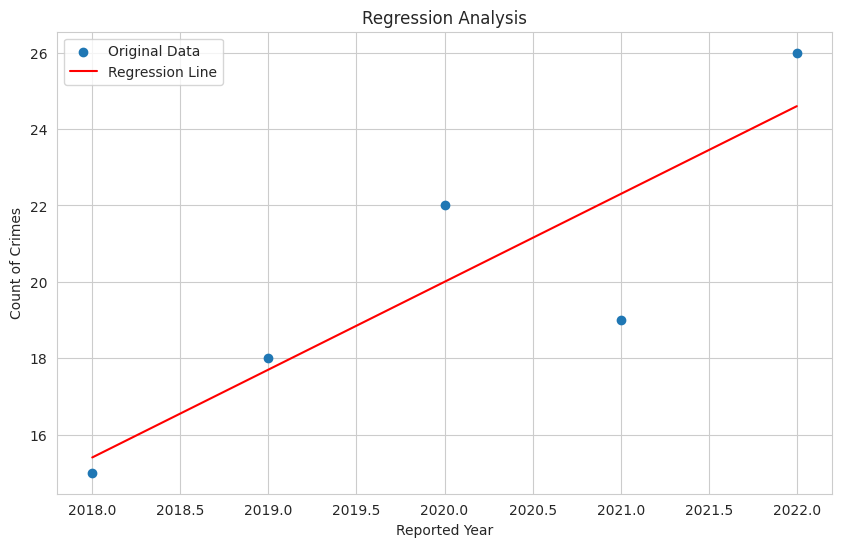

In [ ]:
predictions = model.predict(X_with_const)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Original Data')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.xlabel('Reported Year')
plt.ylabel('Count of Crimes')
plt.title('Regression Analysis')
plt.legend()
plt.grid(True)
plt.show()

## Regression 2

In [ ]:
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame containing the data
# X variable: reported_year
X = np.unique(df['reported_year'])
X.sort()  # Sort the unique years

# Y variable: total victim count
y = df.groupby('reported_year')['victim_count'].sum()

# Normalize the X variable (reported_year) using min-max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X.reshape(-1, 1))

# Add a constant to the independent variable
X_with_const = sm.add_constant(X_normalized)

# Fit the regression model
model = sm.OLS(y, X_with_const).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           victim_count   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     8.308
Date:                Wed, 14 Feb 2024   Prob (F-statistic):             0.0634
Time:                        10:46:54   Log-Likelihood:                -11.938
No. Observations:                   5   AIC:                             27.88
Df Residuals:                       3   BIC:                             27.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6000      2.634      5.542      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


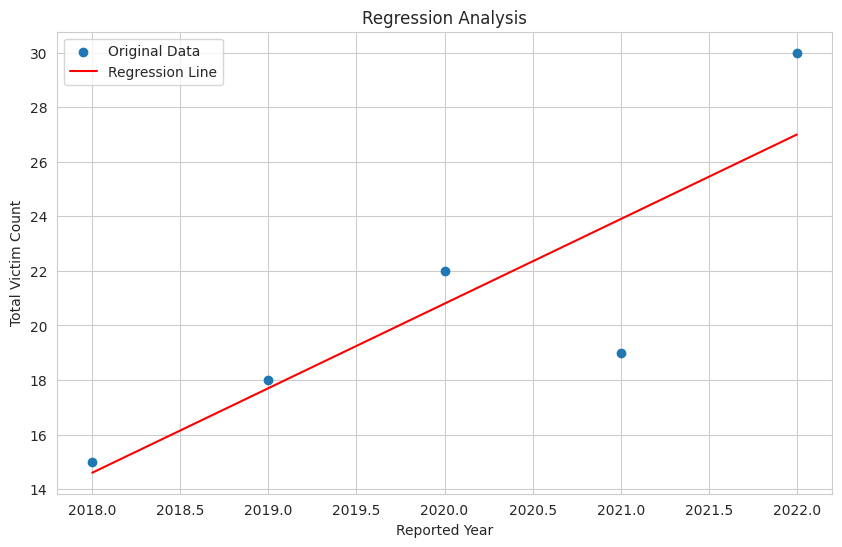

In [ ]:
# Predictions
predictions = model.predict(X_with_const)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Original Data')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.xlabel('Reported Year')
plt.ylabel('Total Victim Count')
plt.title('Regression Analysis')
plt.legend()
plt.grid(True)
plt.show()

## Regression 3

In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Assuming df is your DataFrame containing the data

# One-hot encode offense_category_id
encoder = OneHotEncoder(sparse=False)
X_category = encoder.fit_transform(df[['offense_category_id']])

# Normalize the reported_year using min-max scaling
scaler_year = MinMaxScaler()
X_year_normalized = scaler_year.fit_transform(df[['reported_year']])

# Combine X variables
X = np.concatenate((X_year_normalized, X_category), axis=1)

# Y variable: total victim count, make sure this matches the structure of your DataFrame
# If every row in df represents a unique combination, this is fine. Otherwise, adjust accordingly.
y = df['victim_count'].values

# Normalize the X variables using min-max scaling (if needed)
# Note: Since we're already normalizing reported_year and one-hot encoding categories, this step may be redundant.
# But if there are other numeric features you wish to normalize, include them before this step.

# Add a constant to the independent variables
X_with_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_with_const).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1.693
Date:                Wed, 14 Feb 2024   Prob (F-statistic):             0.0768
Time:                        05:38:41   Log-Likelihood:                -38.370
No. Observations:                 100   AIC:                             104.7
Df Residuals:                      86   BIC:                             141.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9256      0.075     12.345      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.columns

Index(['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'first_occurrence_date',
       'last_occurrence_date', 'reported_date', 'incident_address', 'geo_x',
       'geo_y', 'geo_lon', 'geo_lat', 'district_id', 'precinct_id',
       'neighborhood_id', 'is_crime', 'is_traffic', 'victim_count',
       'reported_year', 'reported_month', 'reported_day', 'reported_hour',
       'reported_hour_str', 'day_of_week'],
      dtype='object')

## Regression 4

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.api import OLS, add_constant


# Preprocessing for categorical variables
categorical_features = ['offense_category_id', 'day_of_week']
categorical_transformer = OneHotEncoder(drop='first')  # Drop first to avoid dummy variable trap

# Preprocessing for numeric variables (if needed)
numeric_features = ['reported_year', 'reported_month', 'reported_day', 'reported_hour']
numeric_transformer = StandardScaler()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Prepare the model pipeline (excluding the model fitting for demonstration)
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing
X_processed = pipeline.fit_transform(df)

# Dependent variable
y = df['victim_count'].values


# Extract binary variables as a numpy array
binary_variables = df[['is_crime', 'is_traffic']].values

# Ensure binary_variables is 2-dimensional (n_samples, n_features)
if binary_variables.ndim == 1:
    binary_variables = binary_variables.reshape(-1, 1)

# Now, concatenate X_processed with binary_variables
try:
    X = np.concatenate((X_processed, binary_variables), axis=1)
except ValueError as e:
    print(f"Concatenation error: {e}")
    # Inspect shapes to debug further
    print(f"X_processed shape: {X_processed.shape}")
    print(f"binary_variables shape: {binary_variables.shape}")

# Proceed with adding a constant, splitting, and fitting the model...

# Add constant for OLS
X_with_const = add_constant(X)

# Split the data into training and testing sets (optional)
# X_train, X_test, y_train, y_test = train_test_split(X_with_const, y, test_size=0.2, random_state=42)

# Fit the regression model
model = OLS(y, X_with_const).fit()

# Print the summary of the regression model
print(model.summary())


Concatenation error: zero-dimensional arrays cannot be concatenated
X_processed shape: (100, 22)
binary_variables shape: (100, 2)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1.693
Date:                Wed, 14 Feb 2024   Prob (F-statistic):             0.0768
Time:                        05:38:42   Log-Likelihood:                -38.370
No. Observations:                 100   AIC:                             104.7
Df Residuals:                      86   BIC:                             141.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

## Regression 5

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming your dataframe is named 'df'
# Convert 'reported_hour' to numeric if it's not already in numeric format
df['reported_hour'] = pd.to_numeric(df['reported_hour'])

# Perform simple linear regression
X = df['reported_hour']
y = df['victim_count']
X = sm.add_constant(X)  # Add intercept term

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           victim_count   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8609
Date:                Wed, 14 Feb 2024   Prob (F-statistic):              0.356
Time:                        10:51:59   Log-Likelihood:                -49.325
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1246      0.100     11.289

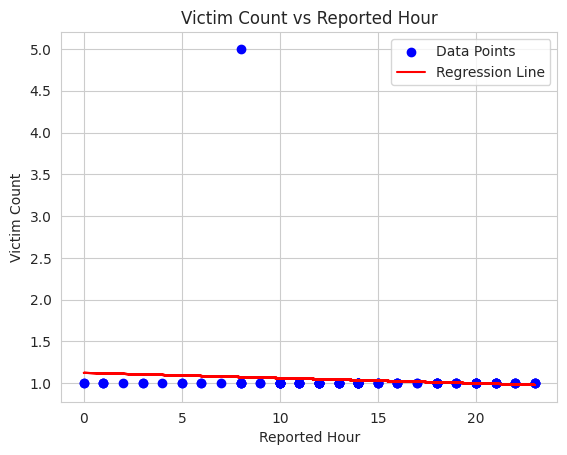

In [ ]:
plt.scatter(X['reported_hour'], y, color='blue', label='Data Points')

# Plotting the regression line
plt.plot(X['reported_hour'], model.predict(X), color='red', label='Regression Line')

plt.xlabel('Reported Hour')
plt.ylabel('Victim Count')
plt.title('Victim Count vs Reported Hour')
plt.legend()
plt.show()

## Regrisson 6

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Assuming your dataframe is named 'df'

# Select independent variables
X = df[['district_id', 'reported_year', 'reported_month']]

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, columns=['district_id'], drop_first=True)

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Add intercept term
X_normalized = sm.add_constant(X_normalized)

# Dependent variable
y = df['victim_count']

# Fit multiple linear regression model
model = sm.OLS(y, X_normalized).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           victim_count   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.395
Date:                Wed, 14 Feb 2024   Prob (F-statistic):              0.209
Time:                        10:58:10   Log-Likelihood:                -43.979
No. Observations:                 100   AIC:                             106.0
Df Residuals:                      91   BIC:                             129.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0400      0.039     26.412      0.0

## Regression 7

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming your dataframe is named 'df'

# Select independent variables
X = df[['district_id', 'reported_year', 'reported_month']]
X = pd.get_dummies(X, columns=['district_id'], drop_first=True)  # Convert district_id to dummy variables, drop first

# Add intercept term
X = sm.add_constant(X)

# Dependent variable
y = df['is_crime']  # Assuming 'is_crime' column indicates whether it's a crime or not (1 for crime, 0 for not)

# Fit multiple linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               is_crime   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -11.38
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               1.00
Time:                        10:59:29   Log-Likelihood:                 2940.2
No. Observations:                 100   AIC:                            -5862.
Df Residuals:                      91   BIC:                            -5839.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0000   6.69e-12   1.49e

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


## Regresion 8


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming your dataframe is named 'df'

# Select independent variables
X = df[['district_id', 'reported_year', 'reported_month', 'day_of_week', 'reported_hour']]
X = pd.get_dummies(X, columns=['district_id', 'day_of_week'], drop_first=True)  # Convert district_id and day_of_week to dummy variables, drop first

# Add intercept term
X = sm.add_constant(X)

# Dependent variable
y = df['is_crime']  # Assuming 'is_crime' column indicates whether it's a crime or not (1 for crime, 0 for not)

# Fit multiple linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               is_crime   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -5.600
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               1.00
Time:                        11:02:47   Log-Likelihood:                 2959.2
No. Observations:                 100   AIC:                            -5886.
Df Residuals:                      84   BIC:                            -5845.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0000   6.03e-12   1.66e

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from mlxtend.evaluate import paired_ttest_kfold_cv
from sklearn.preprocessing import minmax_scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.utils import shuffle
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from statistics import median
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
import datetime
from sklearn.feature_selection import SelectKBest

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif
import numpy as np
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

codes=pd.read_csv('crime.csv',  encoding='latin1')
codes.columns = map(str.upper, codes.columns)

codes=codes[:15000]

codes['REPORTED_DATE']=codes.REPORTED_DATE.apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
codes['year']=codes.REPORTED_DATE.apply(lambda x:x.strftime('%Y'))
codes['month']=codes.REPORTED_DATE.apply(lambda x:x.strftime('%m'))
codes['day']=codes.REPORTED_DATE.apply(lambda x:x.strftime('%d'))
codes['hour']=codes.REPORTED_DATE.apply(lambda x:x.strftime('%H'))

for col_name in codes.columns:
    if(codes[col_name].dtype == 'object'):
        codes[col_name]= codes[col_name].astype('category')
        codes[col_name] = codes[col_name].cat.codes
codes=codes.fillna(-999)
codes= shuffle(codes)

y=codes['OFFENSE_CATEGORY_ID']

X=codes.drop(['OFFENSE_CATEGORY_ID','FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE','REPORTED_DATE','INCIDENT_ADDRESS','INCIDENT_ID'],axis=1)


X=minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)


nb1=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,max_depth=4)
nb2=nb=DecisionTreeClassifier(max_depth=7)
nb3=LinearDiscriminantAnalysis()

t, p = paired_ttest_kfold_cv(estimator1=nb1,
                              estimator2=nb2,

                              X=X, y=y,
                              random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)


t statistic: nan
p value: nan


/usr/local/lib/python3.10/dist-packages/mlxtend/evaluate/ttest.py:231: RuntimeWarning: invalid value encountered in scalar divide
  t_stat = numerator / denominator


(255330, 16) (131535, 16) (255330,) (131535,)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


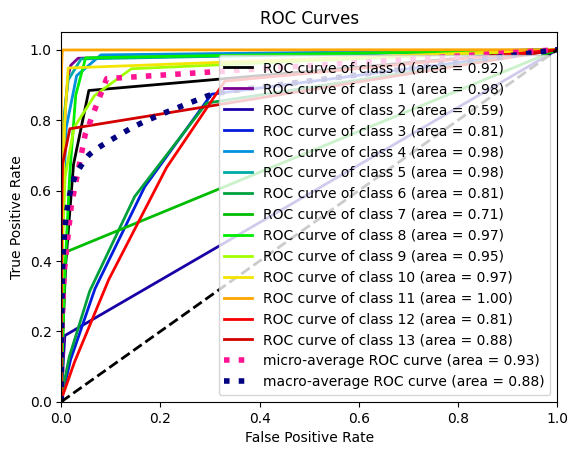

In [ ]:
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier

codes=pd.read_csv('crime.csv',  encoding='latin1')
codes.columns = map(str.upper, codes.columns)
codes['REPORTED_DATE']=codes.REPORTED_DATE.apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
codes['year']=codes.REPORTED_DATE.apply(lambda x:x.strftime('%Y'))
codes['month']=codes.REPORTED_DATE.apply(lambda x:x.strftime('%m'))
codes['day']=codes.REPORTED_DATE.apply(lambda x:x.strftime('%d'))
codes['hour']=codes.REPORTED_DATE.apply(lambda x:x.strftime('%H'))

for col_name in codes.columns:
    if(codes[col_name].dtype == 'object'):
        codes[col_name]= codes[col_name].astype('category')
        codes[col_name] = codes[col_name].cat.codes
codes=codes.fillna(-999)
codes= shuffle(codes)

y=codes['OFFENSE_CATEGORY_ID']

X=codes.drop(['OFFENSE_CATEGORY_ID','FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE','REPORTED_DATE','INCIDENT_ADDRESS','INCIDENT_ID','OFFENSE_ID','OFFENSE_CODE_EXTENSION'],axis=1)

X=minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.34,random_state=42,stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf3 = KNeighborsClassifier(n_neighbors=5)

clf=clf3.fit(X_train,y_train)
y_pred=clf.predict(X_test)

probs = clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, probs)
plt.show()


train-test-split accuracy:  0.545041243775421
Confusion Matrix :


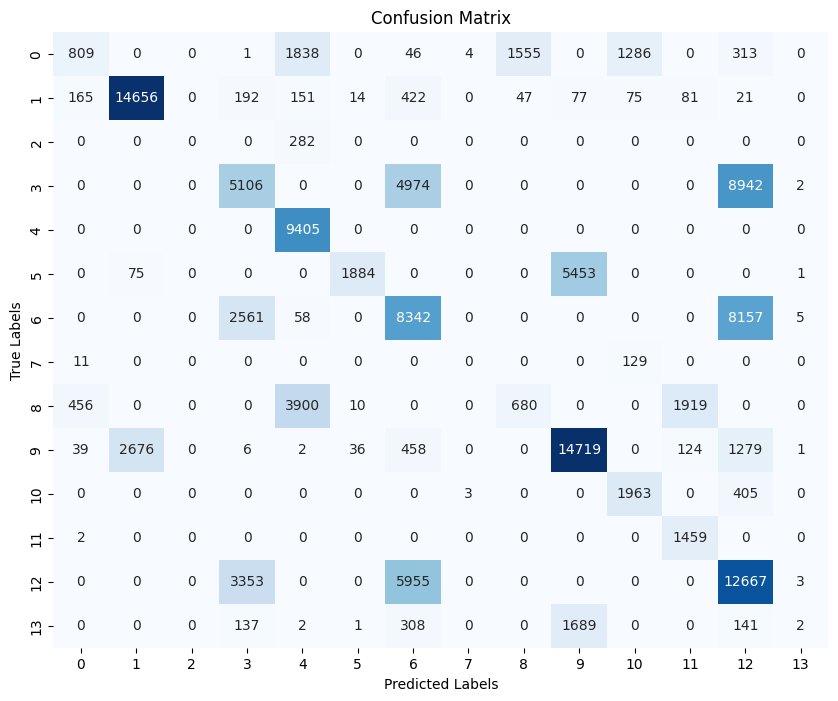

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report:                precision    recall  f1-score   support

           0       0.55      0.14      0.22      5852
           1       0.84      0.92      0.88     15901
           2       0.00      0.00      0.00       282
           3       0.45      0.27      0.34     19024
           4       0.60      1.00      0.75      9405
           5       0.97      0.25      0.40      7413
           6       0.41      0.44      0.42     19123
           7       0.00      0.00      0.00       140
           8       0.30      0.10      0.15      6965
           9       0.67      0.76      0.71     19340
          10       0.57      0.83      0.67      2371
          11       0.41      1.00      0.58      1461
          12       0.40      0.58      0.47     21978
          13       0.14      0.00      0.00      2280

    accuracy                           0.55    131535
   macro avg       0.45      0.45      0.40    131535
weighted avg       0.55      0.55      0.51    131535

1

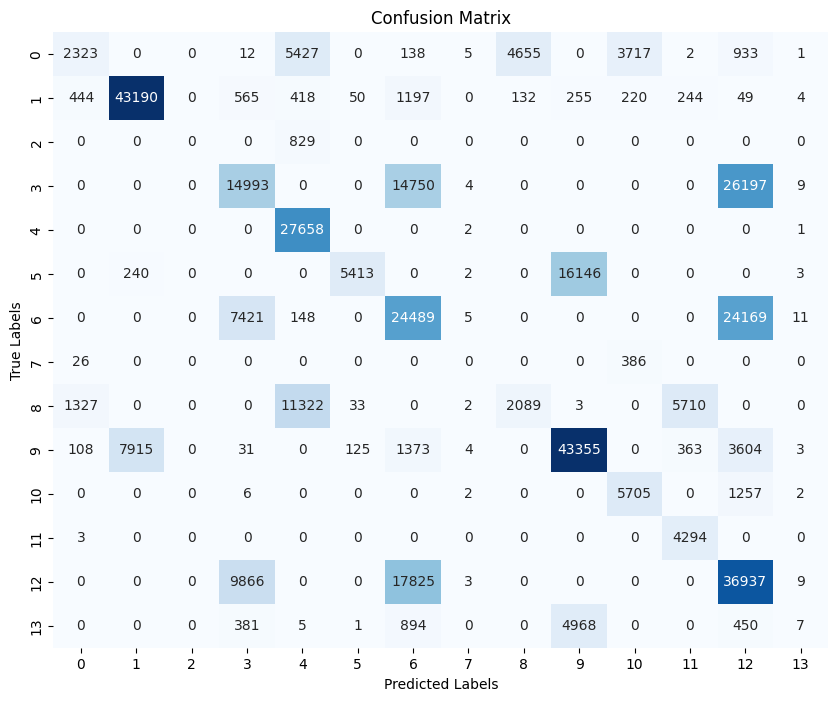

MSE:  17.372468432140412
10-fold:  [0.68946694 0.69146703 0.69004155 0.69201954 0.69039516 0.69274885
 0.69050566 0.69407488 0.68983159 0.69012995]
Random Oversample accuracy:  0.6910681135077794


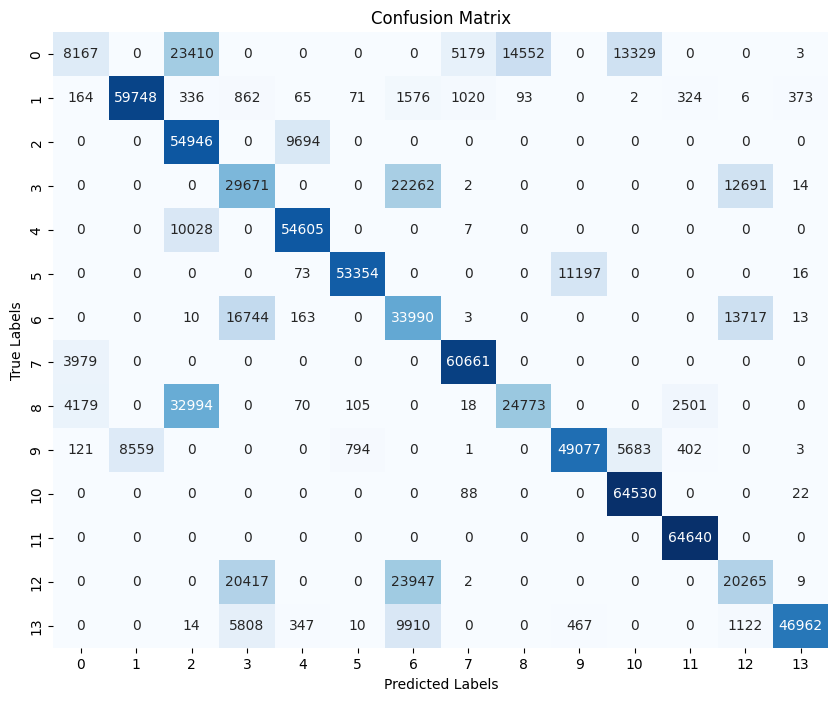

10-fold:  [0.65857886 0.68284229 0.70883882 0.67590988 0.70363951 0.6932409
 0.72443674 0.68284229 0.69270833 0.69444444]
 UnderSample accuracy:  0.6917482067205853


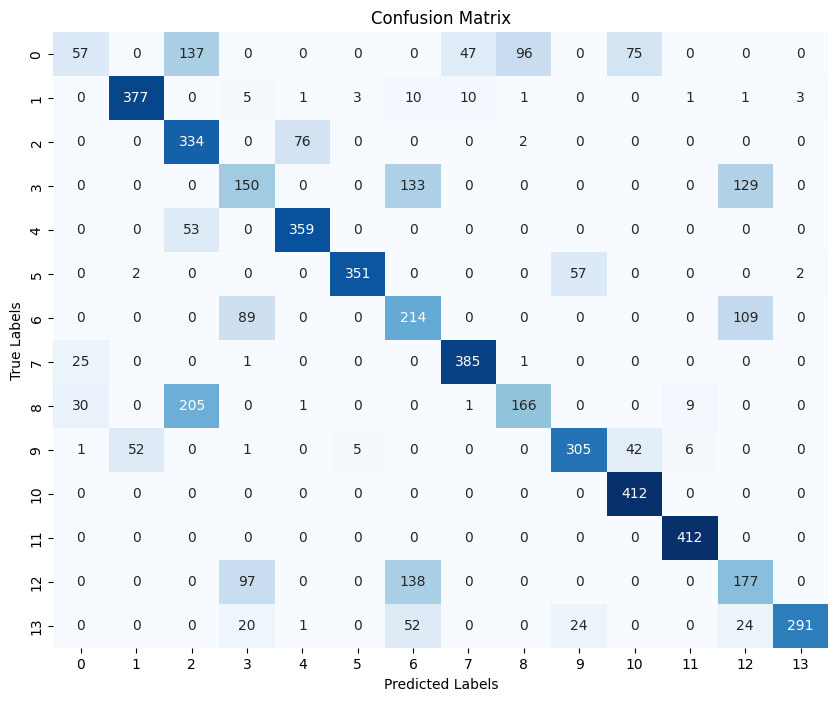

10-fold:  [0.69408593 0.69505835 0.69326821 0.69422958 0.69452793 0.69508045
 0.69471579 0.69437323 0.69569926 0.69620757]
Smote Oversample accuracy:  0.6947246287128712


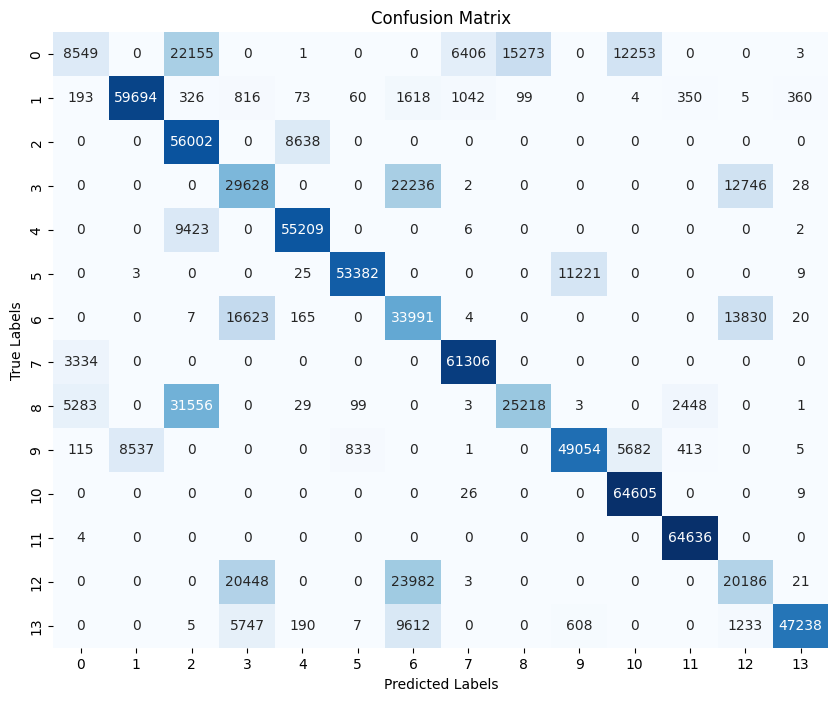

10-fold:  [0.58950108 0.5882633  0.59004062 0.58915196 0.58964675 0.59142413
 0.58793284 0.58894849 0.59161456 0.58980544]
 TomeLinks Undersample accuracy:  0.5896329166313412


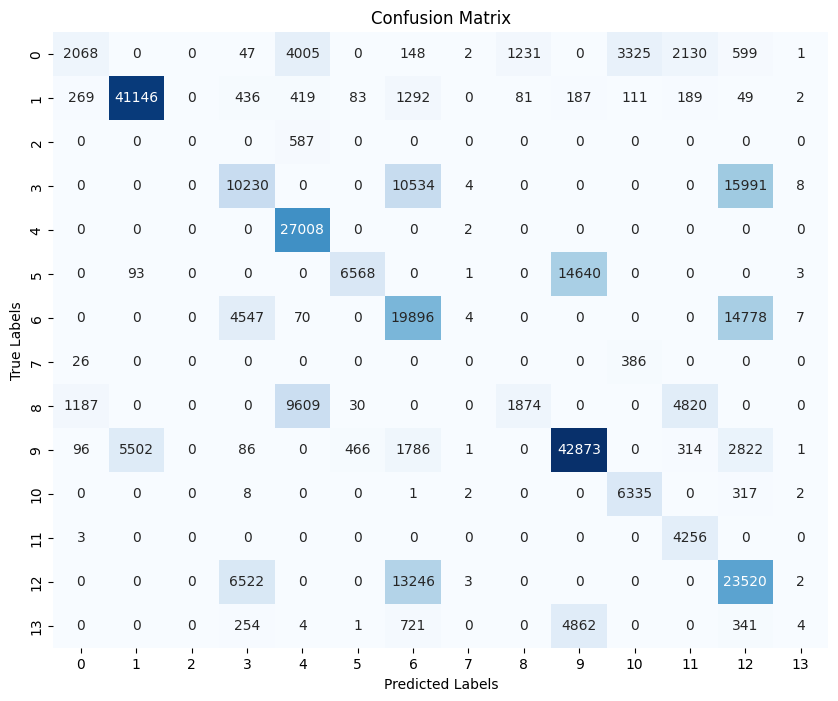

10-fold:  [0.71414171 0.71538416 0.71450172 0.71468927 0.7136695  0.71737347
 0.71474787 0.7171742  0.71491197 0.71057505]
 balanced accuracy:  0.7147168934455368


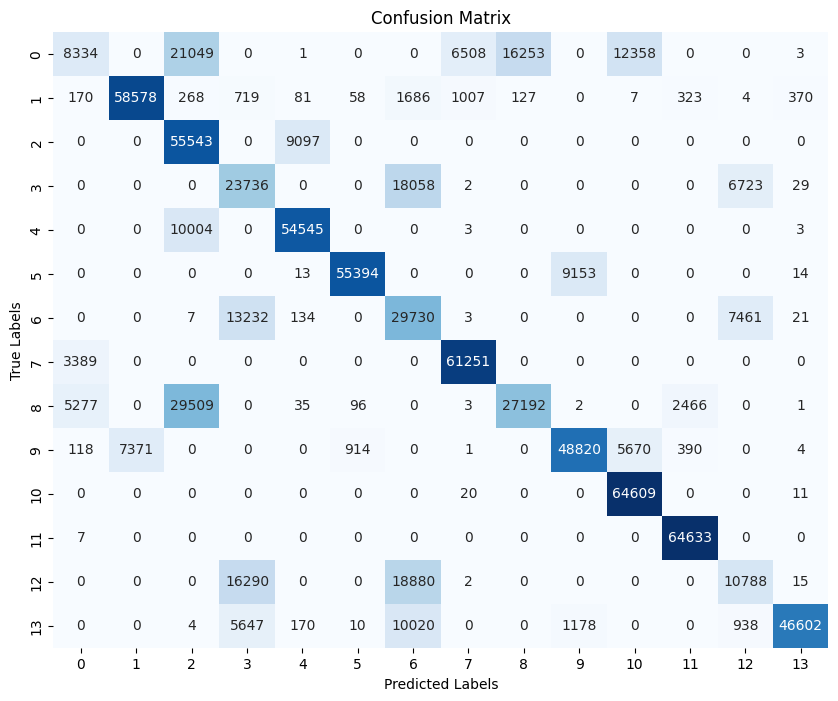

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 9 10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


 accuracy for SelectKBest:  0.545041243775421


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      0.14      0.22      5852
           1       0.84      0.92      0.88     15901
           2       0.00      0.00      0.00       282
           3       0.45      0.27      0.34     19024
           4       0.60      1.00      0.75      9405
           5       0.97      0.25      0.40      7413
           6       0.41      0.44      0.42     19123
           7       0.00      0.00      0.00       140
           8       0.30      0.10      0.15      6965
           9       0.67      0.76      0.71     19340
          10       0.57      0.83      0.67      2371
          11       0.41      1.00      0.58      1461
          12       0.40      0.58      0.47     21978
          13       0.14      0.00      0.00      2280

    accuracy                           0.55    131535
   macro avg       0.45      0.45      0.40    131535
weighted avg       0.55      0.55      0.51    131535



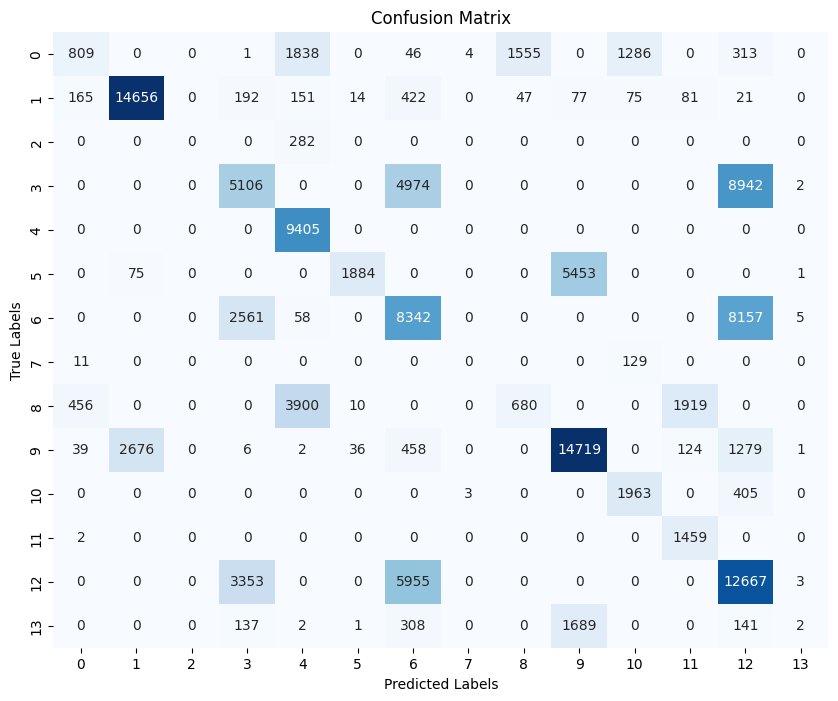

ValueError: No feature in X meets the variance threshold 0.16000

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import seaborn as sns
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statistics import median
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif
import numpy as np
from sklearn.metrics import classification_report

import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale

df=pd.read_csv('crime.csv',  encoding='latin1')
df.columns = map(str.upper, df.columns)

df['REPORTED_DATE']=df.REPORTED_DATE.apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
df['year']=df.REPORTED_DATE.apply(lambda x:x.strftime('%Y'))
df['month']=df.REPORTED_DATE.apply(lambda x:x.strftime('%m'))
df['day']=df.REPORTED_DATE.apply(lambda x:x.strftime('%d'))
df['hour']=df.REPORTED_DATE.apply(lambda x:x.strftime('%H'))

for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
df=df.fillna(-999)
df= shuffle(df)

y=df['OFFENSE_CATEGORY_ID']

X=df.drop(['OFFENSE_CATEGORY_ID','FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE','REPORTED_DATE','INCIDENT_ADDRESS','INCIDENT_ID','OFFENSE_ID','OFFENSE_CODE_EXTENSION'],axis=1)


X=minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.34,random_state=42,stratify=y)

clf=LinearDiscriminantAnalysis().fit(X_train,y_train)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
a=accuracy_score(y_test,y_pred)
print('train-test-split accuracy: ',a)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
plt.figure(figsize=(10, 8))
sns.heatmap(results, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print('classification report: ', classification_report(y_test, y_pred))


nb=LinearDiscriminantAnalysis()
kb=StratifiedKFold(10)
#kb = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
scores=cross_val_score(nb,X,y,cv=kb,scoring='accuracy')
print("10-fold: ",scores)
print('accuracy for Labor-relation: ',scores.mean())
y_pred = cross_val_predict(nb, X,y, cv=kb)


m=accuracy_score(y, y_pred)
print("different accuracy: ", m)
conf_mat = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
mse=mean_squared_error(y, y_pred)
print('MSE: ',mse)


#RandomOversample
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
nb=LinearDiscriminantAnalysis()
kb=StratifiedKFold(10)
scores=cross_val_score(nb,X_resampled,y_resampled,cv=kb,scoring='accuracy')
print("10-fold: ",scores)
print('Random Oversample accuracy: ',scores.mean())
y_pred = cross_val_predict(nb, X_resampled,y_resampled, cv=kb)
conf_mat = confusion_matrix(y_resampled, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#RandomUnderSample
rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)
nb=LinearDiscriminantAnalysis()
kb=StratifiedKFold(10)
scores=cross_val_score(nb,X_resampled,y_resampled,cv=kb,scoring='accuracy')
print("10-fold: ",scores)
print(' UnderSample accuracy: ',scores.mean())
y_pred = cross_val_predict(nb, X_resampled,y_resampled, cv=kb)
conf_mat = confusion_matrix(y_resampled, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#smote for oversample
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
nb=LinearDiscriminantAnalysis()
kb=StratifiedKFold(10)
scores=cross_val_score(nb,X_resampled,y_resampled,cv=kb,scoring='accuracy')
print("10-fold: ",scores)
print('Smote Oversample accuracy: ',scores.mean())
y_pred = cross_val_predict(nb, X_resampled,y_resampled, cv=kb)
conf_mat = confusion_matrix(y_resampled, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#tomelinks for undersample
tl = TomekLinks()
X_resampled, y_resampled  = tl.fit_resample(X, y)

nb=LinearDiscriminantAnalysis()
kb=StratifiedKFold(10)
scores=cross_val_score(nb,X_resampled,y_resampled,cv=kb,scoring='accuracy')
print("10-fold: ",scores)
print(' TomeLinks Undersample accuracy: ',scores.mean())
y_pred = cross_val_predict(nb, X_resampled,y_resampled, cv=kb)
conf_mat = confusion_matrix(y_resampled, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#balanced
smt = SMOTETomek()
X_resampled, y_resampled= smt.fit_resample(X, y)
nb=LinearDiscriminantAnalysis()
kb=StratifiedKFold(10)
scores=cross_val_score(nb,X_resampled,y_resampled,cv=kb,scoring='accuracy')
print("10-fold: ",scores)
print(' balanced accuracy: ',scores.mean())
y_pred = cross_val_predict(nb, X_resampled,y_resampled, cv=kb)
conf_mat = confusion_matrix(y_resampled, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



pipeline = Pipeline([
                     ('ANOVA', SelectKBest(f_classif, k='all')),
                     ('clf',LinearDiscriminantAnalysis())])
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)

ytest = np.array(y_test)
# confusion matrix and classification report(precision, recall, F1-score)
y_pred=model.predict(X_test)

a=accuracy_score(y_pred,ytest)
print(" accuracy for SelectKBest: ",a)

print(classification_report(ytest, model.predict(X_test)))
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(ytest, model.predict(X_test)), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


pipeline = Pipeline([
                     ('VarianceThreshold', VarianceThreshold(threshold=(.8 * (1 - .8)))),
                     ('clf', LinearDiscriminantAnalysis())])
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)

ytest = np.array(y_test)
# confusion matrix and classification report(precision, recall, F1-score)
y_pred=model.predict(X_test)

a=accuracy_score(y_pred,ytest)
print(" accuracy for VarianceThreshold : ",a)

print(classification_report(ytest, model.predict(X_test)))
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(ytest, model.predict(X_test)), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
